# Diageo Iowa H1 2025 Sales Performance: Exploratory Data Analysis

**Objective:**  
This notebook aims to conduct an exploratory data analysis (EDA) to assess Diageo"s sales performance in H1 2025, identify key growth or decline drivers, and evaluate Diageo’s position in the competitive landscape. The ultimate goal is to uncover insights that inform actionable strategies to help Diageo achieve its 5% full-year growth target for 2025.

**Scope of Work:**

1. **Performance Review (H1 2025)**

   1.1 Analyze overall sales trends and Year-over-Year (YoY) changes

   1.2 Identify core drivers of growth or decline

   1.3 Forecast H2 2025 revenue 


2. **Understanding Variant Decline via Market & Competitive Analysis**

   2.1 Evaluate Diageo’s current market share and performance
   
   2.2 Compare against key competitors to surface opportunities or threats
   

3. **Dashboard Preparation**
   Structure and transform data for interactive dashboard development

# Section 1: Diageo Sales Performance in H1 2025

## 1.1 Overall Sales Trend & Key Metrics

This section reviews Diageo's overall sales performance in Iowa during H1 2025 and compares it with the same period in 2024 to identify major changes in revenue and volume.

Key metrics analyze:
- Total revenue
- Number of orders
- Average order value (AOV)

I also explore how performance varies across key dimensions including product variants, store locations - city and county. This helps uncover specific areas of underperformance or opportunity.


I begin by loading the cleaned dataset and isolating Diageo-specific records for focused analysis.

In [1]:
import pandas as pd

df_clean = pd.read_parquet("C:/Users/vothk/Portfolio/Diageo-Iowa-B2B-Sales-Performance-Forecasting-Dashboard-for-2025/Data/Clean_data/df_clean_data.parquet")

pd.set_option("display.max_columns", None)
df_clean.head(5)

,Invoice/Item Number,Date,Store ID,Store Name,Address,City,Zip Code,Store Location,County,Category ID,Category Name,Manufacturer ID,Manufacturer Name,Variant ID,Item Description,Pack,Bottle Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Volume Sold (Liters),Volume Sold (Gallons),Year,Quarter,Month,Weekday,Season,Revenue,CLV,Average_Order_Value,Frequency,Alcohol Type
0,INV-54554500001,2023-01-02,5245,Best Trip,"1516, SE 1ST ST",Des Moines,50315.0,POINT (-93.61379 41.57608),Polk,1022200,100% Agave Tequila,260,Diageo Americas,89177,Casamigos Reposado,6,750,29.99,44.99,3,134.97,2.25,0.59,2023,1,1,Monday,Winter,89.97,117547.74,51.420709,189.447514,Tequila & Mezcal
1,INV-54554700023,2023-01-02,6303,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,50320.0,POINT (-93.59738 41.55503),Polk,1022100,Mixto Tequila,395,Proximo,89193,Jose Cuervo Especial Reposado,48,200,3.63,5.45,48,261.60,9.60,2.53,2023,1,1,Monday,Winter,174.24,311668.10,87.522634,295.110497,Tequila & Mezcal
2,INV-54554700003,2023-01-02,6303,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,50320.0,POINT (-93.59738 41.55503),Polk,1012200,Scotch Whiskies,260,Diageo Americas,4626,Buchanan Deluxe 12Yr,12,750,20.99,31.49,12,377.88,9.00,2.37,2023,1,1,Monday,Winter,251.88,311668.10,87.522634,295.110497,Whiskey
3,INV-54554100007,2023-01-02,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314.0,POINT (-93.61979 41.60558),Polk,1032100,Imported Vodkas,978,W J Deutsch & Sons Ltd,34598,Luksusowa Vodka,6,1750,14.84,22.26,6,130.50,10.50,2.77,2023,1,1,Monday,Winter,89.04,1211350.28,133.762178,746.373626,Vodka
4,INV-54554300002,2023-01-02,2699,Hy-Vee C-Store #2 - Ankeny,1710 SW ORALABOR ROAD,Ankeny,50023.0,POINT (-93.62362 41.70324),Polk,1031100,American Vodkas,301,Fifth Generation Inc,38176,Titos Handmade Vodka,12,750,10.00,15.00,24,360.00,18.00,4.75,2023,1,1,Monday,Winter,240.00,28363.00,99.171329,23.966480,Vodka


In [2]:
df_clean["Half"] = df_clean["Quarter"].apply(lambda q: "H1" if q in [1, 2] else "H2")
df_clean.rename(columns = {
    "Item Description": "Variant"
}, inplace = True)
# Some changes
df_clean.loc[
    (df_clean["Variant"] == "Crown Royal Blackberry") &
    (df_clean["Alcohol Type"] == "Other"),
    "Alcohol Type"
] = "Whiskey"
df_clean.head(5)

,Invoice/Item Number,Date,Store ID,Store Name,Address,City,Zip Code,Store Location,County,Category ID,Category Name,Manufacturer ID,Manufacturer Name,Variant ID,Variant,Pack,Bottle Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Volume Sold (Liters),Volume Sold (Gallons),Year,Quarter,Month,Weekday,Season,Revenue,CLV,Average_Order_Value,Frequency,Alcohol Type,Half
0,INV-54554500001,2023-01-02,5245,Best Trip,"1516, SE 1ST ST",Des Moines,50315.0,POINT (-93.61379 41.57608),Polk,1022200,100% Agave Tequila,260,Diageo Americas,89177,Casamigos Reposado,6,750,29.99,44.99,3,134.97,2.25,0.59,2023,1,1,Monday,Winter,89.97,117547.74,51.420709,189.447514,Tequila & Mezcal,H1
1,INV-54554700023,2023-01-02,6303,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,50320.0,POINT (-93.59738 41.55503),Polk,1022100,Mixto Tequila,395,Proximo,89193,Jose Cuervo Especial Reposado,48,200,3.63,5.45,48,261.60,9.60,2.53,2023,1,1,Monday,Winter,174.24,311668.10,87.522634,295.110497,Tequila & Mezcal,H1
2,INV-54554700003,2023-01-02,6303,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,50320.0,POINT (-93.59738 41.55503),Polk,1012200,Scotch Whiskies,260,Diageo Americas,4626,Buchanan Deluxe 12Yr,12,750,20.99,31.49,12,377.88,9.00,2.37,2023,1,1,Monday,Winter,251.88,311668.10,87.522634,295.110497,Whiskey,H1
3,INV-54554100007,2023-01-02,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314.0,POINT (-93.61979 41.60558),Polk,1032100,Imported Vodkas,978,W J Deutsch & Sons Ltd,34598,Luksusowa Vodka,6,1750,14.84,22.26,6,130.50,10.50,2.77,2023,1,1,Monday,Winter,89.04,1211350.28,133.762178,746.373626,Vodka,H1
4,INV-54554300002,2023-01-02,2699,Hy-Vee C-Store #2 - Ankeny,1710 SW ORALABOR ROAD,Ankeny,50023.0,POINT (-93.62362 41.70324),Polk,1031100,American Vodkas,301,Fifth Generation Inc,38176,Titos Handmade Vodka,12,750,10.00,15.00,24,360.00,18.00,4.75,2023,1,1,Monday,Winter,240.00,28363.00,99.171329,23.966480,Vodka,H1


In [3]:
df_Diageo = df_clean[df_clean["Manufacturer Name"] == "Diageo Americas"]
df_Diageo.head(3)

,Invoice/Item Number,Date,Store ID,Store Name,Address,City,Zip Code,Store Location,County,Category ID,Category Name,Manufacturer ID,Manufacturer Name,Variant ID,Variant,Pack,Bottle Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Volume Sold (Liters),Volume Sold (Gallons),Year,Quarter,Month,Weekday,Season,Revenue,CLV,Average_Order_Value,Frequency,Alcohol Type,Half
0,INV-54554500001,2023-01-02,5245,Best Trip,"1516, SE 1ST ST",Des Moines,50315.0,POINT (-93.61379 41.57608),Polk,1022200,100% Agave Tequila,260,Diageo Americas,89177,Casamigos Reposado,6,750,29.99,44.99,3,134.97,2.25,0.59,2023,1,1,Monday,Winter,89.97,117547.74,51.420709,189.447514,Tequila & Mezcal,H1
2,INV-54554700003,2023-01-02,6303,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,50320.0,POINT (-93.59738 41.55503),Polk,1012200,Scotch Whiskies,260,Diageo Americas,4626,Buchanan Deluxe 12Yr,12,750,20.99,31.49,12,377.88,9.00,2.37,2023,1,1,Monday,Winter,251.88,311668.10,87.522634,295.110497,Whiskey,H1
5,INV-54555100014,2023-01-02,2636,Hy-Vee Wine And Spirits / Hubbell,2310 HUBBELL AVE,Des Moines,50317.0,POINT (-93.57411 41.60444),Polk,1012100,Canadian Whiskies,260,Diageo Americas,11297,Crown Royal,12,1000,19.99,29.99,12,359.88,12.00,3.17,2023,1,1,Monday,Winter,239.88,378283.65,111.063902,280.714286,Whiskey,H1


### Sale Shape and Trends

In [4]:
Sale_by_half = df_Diageo[df_Diageo["Half"] == "H1"].groupby("Year").agg(
    Total_Rev = ("Revenue","sum"),
    Num_of_ords = ("Invoice/Item Number", "count")
).sort_values(by = "Year", ascending = True).reset_index()

Sale_by_half["AOV"] = Sale_by_half["Total_Rev"] / Sale_by_half["Num_of_ords"]
Sale_by_half["Rev_Growth_%"] = round(Sale_by_half["Total_Rev"].pct_change().fillna(0) * 100, 2)
Sale_by_half["AOV_Growth_%"] = round(Sale_by_half["AOV"].pct_change().fillna(0) * 100, 2)
Sale_by_half["Order_Growth_%"] = round(Sale_by_half["Num_of_ords"].pct_change().fillna(0) * 100, 2)

Sale_by_half

,Year,Total_Rev,Num_of_ords,AOV,Rev_Growth_%,AOV_Growth_%,Order_Growth_%
0,2023,27780908.89,196655,141.267239,0.00,0.00,0.00
1,2024,28945030.05,192372,150.463841,4.19,6.51,-2.18
2,2025,26855750.66,176522,152.138264,-7.22,1.11,-8.24


Diageo recorded ~$26.8M in revenue from ~176.5K orders in H1 2025. The AOV remained stable at ~$152.  

However, revenue declined by 7.2% YoY, mainly due to an 8.2% drop in order volume. AOV witness a slight increase of 1.1%, indicating that the issue lies more with consumer demand than pricing.

→ Next, I check 3 main metrics - Total Revenue, AOV and number of orders across months.

C:\Users\vothk\AppData\Local\Temp\ipykernel_10776\2584813597.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rate = pivot_metric.pct_change(axis=1) * 100


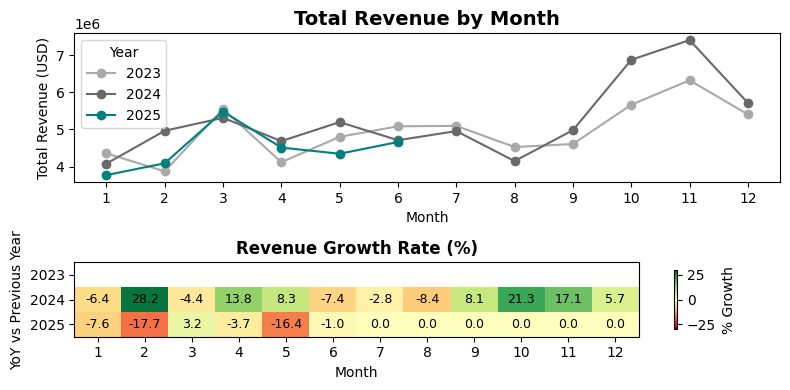

C:\Users\vothk\AppData\Local\Temp\ipykernel_10776\2584813597.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rate = pivot_metric.pct_change(axis=1) * 100


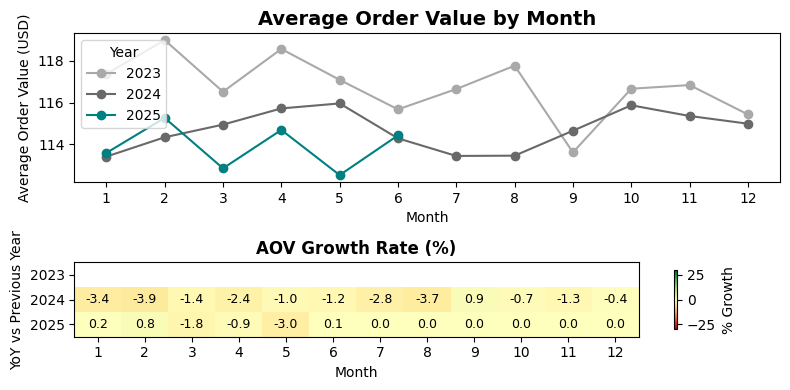

C:\Users\vothk\AppData\Local\Temp\ipykernel_10776\2584813597.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rate = pivot_metric.pct_change(axis=1) * 100


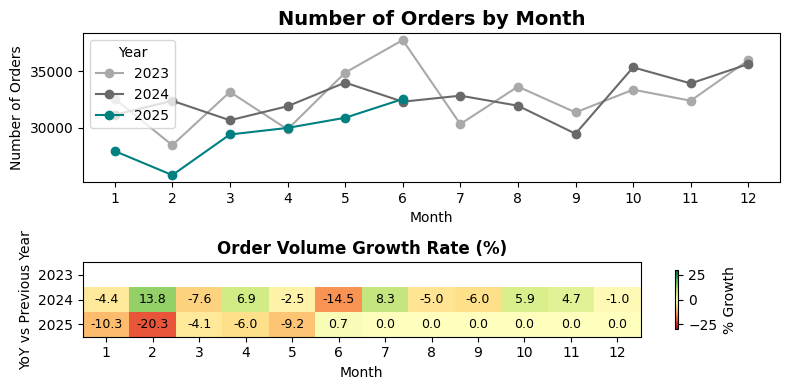

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----- COMMON FUNCTION -----
def plot_metric_by_month_year(df, metric_col, agg_func, ylabel, title, cmap_title, custom_colors):
    # Step 1: Group and Pivot
    df_metric = df.groupby(["Month", "Year"]).agg(
        Metric=(metric_col, agg_func)
    ).sort_values(by="Year", ascending=True).reset_index()
    
    pivot_metric = df_metric.pivot(index="Month", columns="Year", values="Metric")
    growth_rate = pivot_metric.pct_change(axis=1) * 100
    
    # Step 2: Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={"height_ratios": [2, 1]})
    
    # --- Line Chart ---
    for year in pivot_metric.columns:
        ax1.plot(pivot_metric.index, pivot_metric[year], marker="o",label=str(year),color=custom_colors.get(year, "black")        )
    ax1.set_title(title, fontsize=14, fontweight="bold")
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel("Month")
    ax1.set_xticks(range(1, 13))
    ax1.legend(title="Year", loc="upper left")
    ax1.grid(False)

    # --- Heatmap ---
    im = ax2.imshow(growth_rate.T, cmap="RdYlGn", aspect="auto", vmin=-30, vmax=30)

    # Annotate values
    for i, year in enumerate(growth_rate.columns):
        for j, month in enumerate(growth_rate.index):
            value = growth_rate.loc[month, year]
            text = f"{value:.1f}" if pd.notna(value) else ""
            ax2.text(j, i, text, ha="center", va="center", fontsize=9)

    ax2.set_title(f"{cmap_title} Growth Rate (%)", fontsize=12, fontweight="bold")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("YoY vs Previous Year")
    ax2.set_xticks(np.arange(len(growth_rate.index)))
    ax2.set_xticklabels(growth_rate.index)
    ax2.set_yticks(np.arange(len(growth_rate.columns)))
    ax2.set_yticklabels(growth_rate.columns)

    cbar = plt.colorbar(im, ax=ax2, orientation="vertical", shrink=0.8)
    cbar.set_label("% Growth")

    plt.tight_layout()
    plt.show()

# ----- Custom Color Settings -----
custom_colors = {2023: "darkgrey",2024: "dimgrey",2025: "teal"}

# ----- USE FUNCTION FOR 3 METRICS -----
# 1. Total Revenue
plot_metric_by_month_year(
    df=df_Diageo,
    metric_col="Revenue",
    agg_func="sum",
    ylabel="Total Revenue (USD)",
    title="Total Revenue by Month",
    cmap_title="Revenue",
    custom_colors=custom_colors
)

# 2. AOV
plot_metric_by_month_year(
    df=df_Diageo,
    metric_col="Average_Order_Value",
    agg_func="mean",
    ylabel="Average Order Value (USD)",
    title="Average Order Value by Month",
    cmap_title="AOV",
    custom_colors=custom_colors
)

# 3. Number of Orders
plot_metric_by_month_year(
    df=df_Diageo,
    metric_col="Invoice/Item Number",
    agg_func="count",
    ylabel="Number of Orders",
    title="Number of Orders by Month",
    cmap_title="Order Volume",
    custom_colors=custom_colors
)


C:\Users\vothk\AppData\Local\Temp\ipykernel_10776\2885925163.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rate = pivot_metric.pct_change(axis=1) * 100


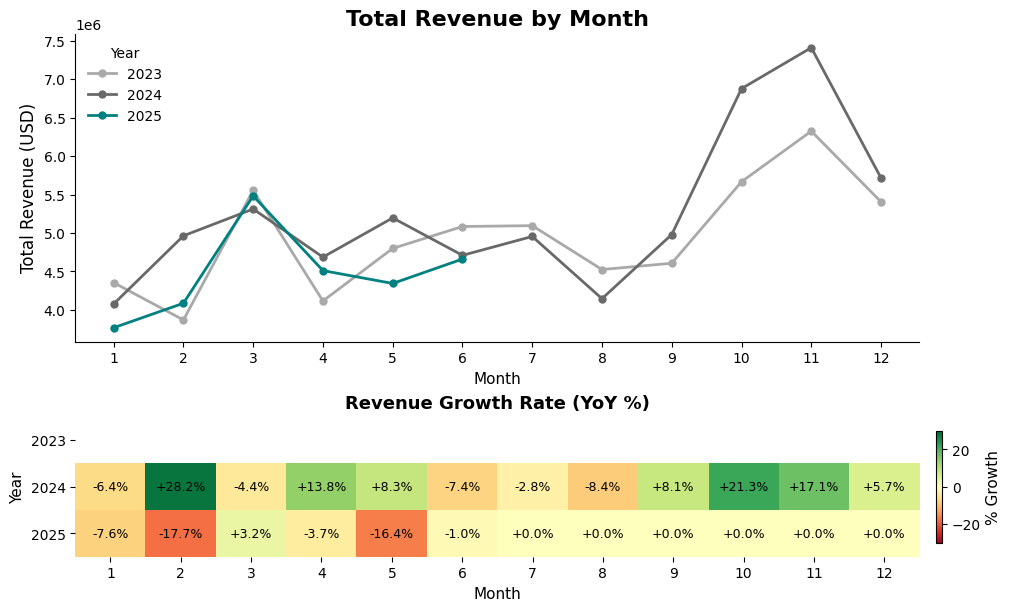

C:\Users\vothk\AppData\Local\Temp\ipykernel_10776\2885925163.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rate = pivot_metric.pct_change(axis=1) * 100


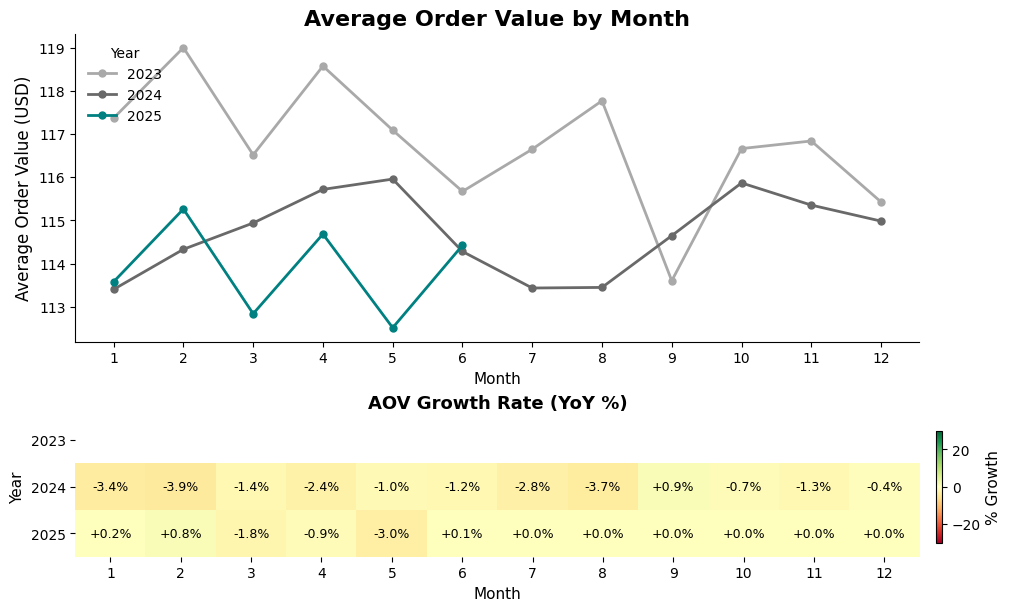

C:\Users\vothk\AppData\Local\Temp\ipykernel_10776\2885925163.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rate = pivot_metric.pct_change(axis=1) * 100


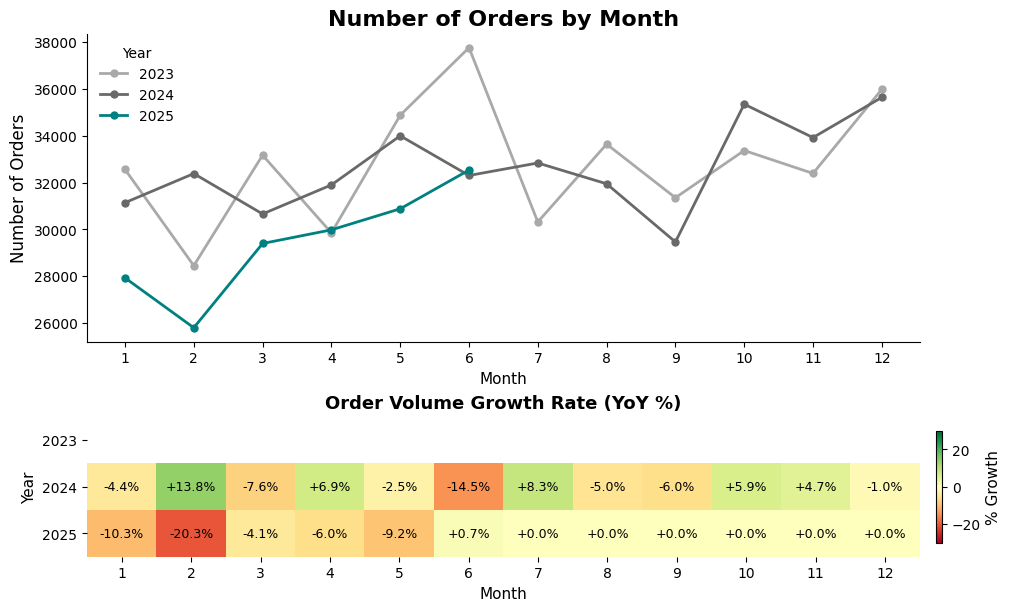

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----- COMMON FUNCTION -----
def plot_metric_by_month_year(df, metric_col, agg_func, ylabel, title, cmap_title, custom_colors):
    # Step 1: Group and Pivot
    df_metric = df.groupby(["Month", "Year"]).agg(
        Metric=(metric_col, agg_func)
    ).sort_values(by="Year", ascending=True).reset_index()
    
    pivot_metric = df_metric.pivot(index="Month", columns="Year", values="Metric")
    growth_rate = pivot_metric.pct_change(axis=1) * 100
    
    # Step 2: Plotting
    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(10, 6),
        gridspec_kw={"height_ratios": [2.2, 1]},
        constrained_layout=True
    )
    
    # --- Line Chart ---
    for year in pivot_metric.columns:
        ax1.plot(
            pivot_metric.index,
            pivot_metric[year],
            marker="o", markersize=5,
            linewidth=2,
            label=str(year),
            color=custom_colors.get(year, "black")
        )
    ax1.set_title(title, fontsize=16, fontweight="bold")
    ax1.set_ylabel(ylabel, fontsize=12)
    ax1.set_xlabel("Month", fontsize=11)
    ax1.set_xticks(range(1, 13))
    ax1.legend(title="Year", loc="upper left", frameon=False)
    ax1.grid(False)
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)

    # --- Heatmap ---
    im = ax2.imshow(
        growth_rate.T, cmap="RdYlGn", aspect="auto",
        vmin=-30, vmax=30
    )

    # Annotate values
    for i, year in enumerate(growth_rate.columns):
        for j, month in enumerate(growth_rate.index):
            value = growth_rate.loc[month, year]
            text = f"{value:+.1f}%" if pd.notna(value) else ""
            ax2.text(j, i, text, ha="center", va="center", fontsize=9, color="black")

    ax2.set_title(f"{cmap_title} Growth Rate (YoY %)", fontsize=13, fontweight="bold")
    ax2.set_xlabel("Month", fontsize=11)
    ax2.set_ylabel("Year", fontsize=11)
    ax2.set_xticks(np.arange(len(growth_rate.index)))
    ax2.set_xticklabels(growth_rate.index)
    ax2.set_yticks(np.arange(len(growth_rate.columns)))
    ax2.set_yticklabels(growth_rate.columns)
    ax2.spines[:].set_visible(False)

    # Colorbar
    cbar = plt.colorbar(im, ax=ax2, orientation="vertical", shrink=0.8, pad=0.02)
    cbar.set_label("% Growth", fontsize=11)

    plt.show()


# ----- Custom Color Settings -----
custom_colors = {
    2023: "darkgrey",
    2024: "dimgrey",
    2025: "teal"
}

# ----- USE FUNCTION FOR 3 METRICS -----
plot_metric_by_month_year(
    df=df_Diageo,
    metric_col="Revenue",
    agg_func="sum",
    ylabel="Total Revenue (USD)",
    title="Total Revenue by Month",
    cmap_title="Revenue",
    custom_colors=custom_colors
)

plot_metric_by_month_year(
    df=df_Diageo,
    metric_col="Average_Order_Value",
    agg_func="mean",
    ylabel="Average Order Value (USD)",
    title="Average Order Value by Month",
    cmap_title="AOV",
    custom_colors=custom_colors
)

plot_metric_by_month_year(
    df=df_Diageo,
    metric_col="Invoice/Item Number",
    agg_func="count",
    ylabel="Number of Orders",
    title="Number of Orders by Month",
    cmap_title="Order Volume",
    custom_colors=custom_colors
)


In 2025, Diageo’s monthly sales performance remained flat to negative in most months, with the exception of March and a modest uptick in May. The most significant year-over-year declines occurred in February and May, with drops of approximately 16–17%. These declines were not driven by changes in average order value (AOV), which remained stable with only minor fluctuations compared to prior years. Instead, total sales appear to have been primarily driven by shifts in order volume.

From a seasonal perspective, October and November consistently emerged as peak-performing months, indicating stronger demand in Q4. This recurring pattern highlights a clear opportunity for targeted commercial actions in the second half of 2025 to support recovery and drive growth.

I will now analyze performance at both the product level (variant, category) and geographic level (store, city, county) to identify where sales growth or decline is concentrated.

## 1.2 Identify core drivers of growth or decline

### Sale by Variants

In [7]:
Sale_by_variant= df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Year"].isin({2024, 2025}))].groupby(["Variant", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Sale_by_variant_pivot = Sale_by_variant.pivot(
    index = "Variant",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Sale_by_variant_pivot["%_Contribution"] = round((Sale_by_variant_pivot[2025]/(Sale_by_variant_pivot[2025].sum()))*100, 2)
Sale_by_variant_pivot["YoY_Growth"] = round(((Sale_by_variant_pivot[2025] - Sale_by_variant_pivot[2024])/Sale_by_variant_pivot[2024])*100, 2)

Sale_by_variant_pivot.head(20)

Year,Variant,2024,2025,%_Contribution,YoY_Growth
0,Crown Royal Regal Apple,3018992.36,2839559.04,10.57,-5.94
1,Crown Royal,2934226.12,2819465.95,10.50,-3.91
2,Captain Morgan Original Spiced,2669781.28,2623004.20,9.77,-1.75
3,Captain Morgan Original Spiced Barrel,2172588.93,1869117.12,6.96,-13.97
4,Crown Royal Blackberry,1916099.46,1346781.63,5.01,-29.71
5,Crown Royal Peach,1635652.17,1307363.67,4.87,-20.07
6,Don Julio Reposado,543082.66,1056965.78,3.94,94.62
7,Smirnoff 80Prf Pet,853110.25,957624.00,3.57,12.25
8,Smirnoff 80Prf,775348.55,736024.22,2.74,-5.07
9,Don Julio Blanco,768050.49,699204.73,2.60,-8.96


Diageo’s sales are highly concentrated, with the top 5 variants contributing approximately 40% of total revenue and the top 20 accounting for nearly 80%. This indicates a strong consumer preference for a small number of variants rather than a fragmented portfolio. Such concentration creates an opportunity to reinforce core variants while selectively expanding high-potential performers.

The three top-selling variants — Crown Royal Regal Apple (10.6%), Crown Royal (10.5%), and Captain Morgan Original Spiced (9.8%) — all experienced year-over-year declines ranging from –1.8% to –5.9%, contributing significantly to Diageo’s overall sales contraction in H1 2025.

Several flavored variants also underperformed, including Crown Royal Blackberry (–29.7%), Peach (–20.1%), and Spiced Barrel (–14.0%). In contrast, a few variants delivered strong growth — notably Don Julio Reposado (+94.6%) and Smirnoff 80Prf Pet (+12.3%) — though their absolute contributions remain limited.

→ While there are signs of emerging momentum in select variants, stabilizing the performance of core variants remains critical to reversing the overall decline.

### Sale by Category

In [8]:
Sale_by_category_Diageo = df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Year"].isin({2024, 2025}))].groupby(["Alcohol Type", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Sale_by_category_Diageo_pivot = Sale_by_category_Diageo.pivot(
    index = "Alcohol Type",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Sale_by_category_Diageo_pivot["%_Contribution"] = round((Sale_by_category_Diageo_pivot[2025]/(Sale_by_category_Diageo_pivot[2025].sum()))*100, 2)
Sale_by_category_Diageo_pivot["Diageo_YoY_Growth"] = round(((Sale_by_category_Diageo_pivot[2025] - Sale_by_category_Diageo_pivot[2024])/Sale_by_category_Diageo_pivot[2024])*100, 2)

Sale_by_category_Diageo_pivot

Year,Alcohol Type,2024,2025,%_Contribution,Diageo_YoY_Growth
0,Whiskey,13170205.77,11472440.71,42.72,-12.89
1,Rum,5662629.40,5244761.93,19.53,-7.38
2,Tequila & Mezcal,3388754.07,3578314.22,13.32,5.59
3,Vodka,3597941.98,3539310.09,13.18,-1.63
4,Liqueur,828635.33,841528.38,3.13,1.56
5,Gin,867380.61,802597.02,2.99,-7.47
6,Schnapps,662787.18,698249.11,2.60,5.35
7,Ready-to-Drink/Cocktails,173914.97,342515.83,1.28,96.94
8,Other,517289.49,275693.53,1.03,-46.70
9,Spirits,69163.49,55567.80,0.21,-19.66


Whiskey remains Diageo’s key category, accounting for 38% of total sales in H1 2025, followed by Rum, Tequila & Mezcal, and Vodka, each contributing between 13–19%. Most core categories experienced yoy declines, except for Tequila, which grew by +5.6%.

Although its total contribution remains limited, the Ready-to-Drink Cocktails category saw the fastest growth at nearly +97% YoY, signaling rising consumer interest.

### Sale by Store

In [9]:
Sale_by_store = df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Year"].isin({2024, 2025}))].groupby(["Store Name", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Sale_by_store_pivot = Sale_by_store.pivot(
    index = "Store Name",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Sale_by_store_pivot["%_Contribution"] = round((Sale_by_store_pivot[2025]/(Sale_by_store_pivot[2025].sum()))*100, 2)
Sale_by_store_pivot["Cummulative_contribution"] = Sale_by_store_pivot["%_Contribution"].cumsum()
Sale_by_store_pivot["YoY_Growth"] = round(((Sale_by_store_pivot[2025] - Sale_by_store_pivot[2024])/Sale_by_store_pivot[2024])*100, 2)

Sale_by_store_pivot.head(50)

Year,Store Name,2024,2025,%_Contribution,Cummulative_contribution,YoY_Growth
0,Hy-Vee #3 / Bdi / Des Moines,1292341.69,1169610.62,4.36,4.36,-9.50
1,Central City 2,1086335.42,1010947.24,3.76,8.12,-6.94
2,Another Round / Dewitt,516448.70,485553.92,1.81,9.93,-5.98
3,I-80 Liquor / Council Bluffs,343146.78,411705.09,1.53,11.46,19.98
4,Benz Distributing,364342.65,386456.51,1.44,12.90,6.07
5,Hy-Vee Wine And Spirits #1 (1281) / Iowa City,309107.71,310089.00,1.15,14.05,0.32
6,Wall To Wall Wine And Spirits / West Des Moines,188235.67,284156.60,1.06,15.11,50.96
7,Wilkie Liquors,236352.48,228122.29,0.85,15.96,-3.48
8,Hy-Vee #3 Food & Drugstore / Davenport,100978.60,201514.51,0.75,16.71,99.56
9,Sam'S Club 6344 / Windsor Heights,201814.45,175520.34,0.65,17.36,-13.03


In H1 2025, Diageo experienced sales declines across most of its top-performing stores in Iowa.
Hy-Vee #3 Des Moines and Central City 2 — Diageo’s top 2 retail accounts, jointly contributing around 8% of total revenue — both recorded yoy declines in Diageo’s sales. Among the top 10 stores, only 1 showed positive growth, while the others saw YoY decreases ranging from –4% to –37%.

The top 50 stores account for just 34% of Diageo’s total revenue, and it takes the top 500 stores to reach 80%, indicating that revenue is widely distributed across the state rather than concentrated in a few key outlets.

Additionally, the YoY change in Diageo’s revenue across individual stores shows no consistent trend — some stores grew, while others declined — reflecting a fragmented and decentralized performance pattern.

→ These findings suggest that Diageo’s commercial strategy in Iowa should be broadly targeted across multiple store tiers and regions, rather than overly focused on a small set of flagship accounts.

### Sale by City

In [10]:
Sale_by_city = df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Year"].isin({2024, 2025}))].groupby(["City", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Sale_by_city_pivot = Sale_by_city.pivot(
    index = "City",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Sale_by_city_pivot["%_Contribution"] = round((Sale_by_city_pivot[2025]/(Sale_by_city_pivot[2025].sum()))*100, 2)
Sale_by_city_pivot["YoY_Growth"] = round(((Sale_by_city_pivot[2025] - Sale_by_city_pivot[2024])/Sale_by_city_pivot[2024])*100, 2)

Sale_by_city_pivot.head(15)

Year,City,2024,2025,%_Contribution,YoY_Growth
0,Des Moines,3773695.81,3519561.90,13.11,-6.73
1,Cedar Rapids,1689926.34,1667202.93,6.21,-1.34
2,Davenport,1151416.82,1086804.68,4.05,-5.61
3,West Des Moines,1001729.20,1005660.75,3.74,0.39
4,Council Bluffs,960904.10,989563.72,3.68,2.98
5,Sioux City,1019086.68,943550.38,3.51,-7.41
6,Dubuque,706327.46,797027.70,2.97,12.84
7,Waterloo,872341.05,728995.93,2.71,-16.43
8,Ankeny,748376.79,709239.20,2.64,-5.23
9,Iowa City,666280.15,653059.35,2.43,-1.98


Des Moines, Cedar Rapids, and Davenport are the top three cities for Diageo sales in Iowa, together accounting for ~20% of total revenue. These are also among the largest urban centers in the state. However, the remaining 80% of revenue is distributed across a wide range of smaller cities, each contributing less than 3%. This reflects a highly dispersed sales network rather than a market concentrated in a few key locations.

This distribution poses both strengths and challenges. On the one hand, it indicates strong statewide penetration and limited reliance on a few cities. On the other hand, it suggests higher complexity in sales execution and performance tracking, as revenue growth or decline trends vary widely and show no consistent geographic pattern.

→ Diageo’s commercial strategy in Iowa should be designed to scale across a wide base of local markets, rather than focusing primarily on a few urban hubs.

### Sale by County

In [11]:
Sale_by_county = df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Year"].isin({2024, 2025}))].groupby(["County", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Sale_by_county_pivot = Sale_by_county.pivot(
    index = "County",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Sale_by_county_pivot["%_Contribution"] = round((Sale_by_county_pivot[2025]/(Sale_by_county_pivot[2025].sum()))*100, 2)
Sale_by_county_pivot["YoY_Growth"] = round(((Sale_by_county_pivot[2025] - Sale_by_county_pivot[2024])/Sale_by_county_pivot[2024])*100, 2)

Sale_by_county_pivot.head(15)

Year,County,2024,2025,%_Contribution,YoY_Growth
0,Polk,6662983.74,6260321.29,23.31,-6.04
1,Linn,2282678.94,2204399.14,8.21,-3.43
2,Scott,1603095.05,1533081.34,5.71,-4.37
3,Black Hawk,1546413.17,1286418.41,4.79,-16.81
4,Johnson,1300971.13,1185544.35,4.41,-8.87
5,Pottawattamie,1038792.29,1049702.93,3.91,1.05
6,Woodbury,1092028.92,994217.24,3.70,-8.96
7,Dubuque,819040.04,889077.49,3.31,8.55
8,Dallas,711932.82,739403.24,2.75,3.86
9,Clinton,785749.76,718638.19,2.68,-8.54


At the county level, nearly all top-performing counties recorded YoY declines in Diageo’s revenue, with only Dubuque (+8.6%) and Dallas (+3.9%) showing positive growth. However, these two counties jointly account for only ~6% of total revenue, limiting their overall impact.

The top 5 counties — Polk, Linn, Scott, Black Hawk, and Johnson — together contribute over 45% of statewide revenue and all experienced YoY declines ranging from –3% to –17%. This underscores the broad-based nature of the downturn across Iowa.

→ These results reinforce the need for a statewide approach to commercial recovery, rather than isolated interventions in a few growth counties.

## Forecast H2 2025 Revenue

To project Diageo's expected sales performance in H2 2025, I applied a time series forecasting model using Facebook Prophet.

I first aggregated daily sales data and prepared it in the required format (ds, y) for Prophet.

The model was configured with both weekly and yearly seasonality, as alcohol sales often exhibit recurring patterns based on both calendar cycles and weekly shopping behaviors.

After fitting the model with historical data up to June 2025, I generated forecasts for the next 184 days (approximately 6 months).

For clarity, I aggregated both actuals and forecasted results to a monthly level and visualized them with confidence intervals to assess potential variability.

This forecast serves as a directional indicator to assess whether Diageo is on track to meet its FY25 revenue growth target.

c:\Users\vothk\Portfolio\Diageo-Iowa-B2B-Sales-Performance-Forecasting-Dashboard-for-2025\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


--- Preparing data for Prophet model ---


07:26:01 - cmdstanpy - INFO - Chain [1] start processing
07:26:01 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\vothk\AppData\Local\Temp\ipykernel_10776\3384572275.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(forecast_monthly["Month"], forecast_monthly["yhat"], "b-", label="Forecast", color="teal")


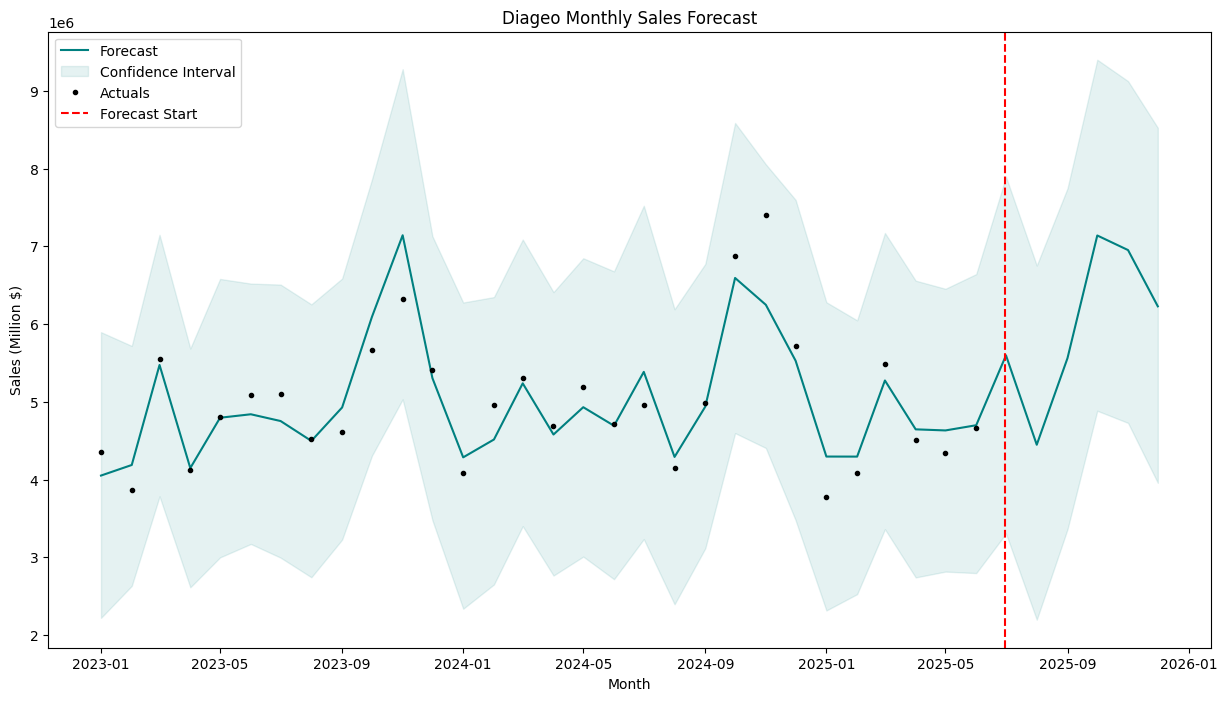

In [12]:
# PREPARE DATA
print("--- Preparing data for Prophet model ---")
daily_sales = df_Diageo.groupby("Date")["Revenue"].sum().reset_index() # Summary sale by day
prophet_df = daily_sales.rename(columns={"Date": "ds", "Revenue": "y"}) # Change columns name

# BUILD AND TRAIN PROPHET MODEL
from prophet import Prophet
model = Prophet(weekly_seasonality=True, yearly_seasonality=True) # Model initialization
model.fit(prophet_df) # Fit model
future_dates = model.make_future_dataframe(periods=184) # Create future time frame (forecast next 6 months)
forecast = model.predict(future_dates) # Forecast

# PLOT FORECAST
# Aggregate Actuals & Forecast by Month and Visualize
actuals_monthly = prophet_df.copy()
actuals_monthly["Month"] = actuals_monthly["ds"].dt.to_period("M")
actuals_monthly = actuals_monthly.groupby("Month")["y"].sum().reset_index()
actuals_monthly["Month"] = actuals_monthly["Month"].dt.to_timestamp()

forecast_monthly = forecast.copy()
forecast_monthly["Month"] = forecast_monthly["ds"].dt.to_period("M")
forecast_monthly = forecast_monthly.groupby("Month")[["yhat", "yhat_lower", "yhat_upper"]].sum().reset_index()
forecast_monthly["Month"] = forecast_monthly["Month"].dt.to_timestamp()

plt.figure(figsize=(15, 8))
plt.plot(forecast_monthly["Month"], forecast_monthly["yhat"], "b-", label="Forecast", color="teal")
plt.fill_between(forecast_monthly["Month"], forecast_monthly["yhat_lower"], forecast_monthly["yhat_upper"], 
                 color="teal", alpha=0.1, label="Confidence Interval")
plt.plot(actuals_monthly["Month"], actuals_monthly["y"], "k.", label="Actuals")
plt.axvline(x=pd.to_datetime("2025-06-30"), color="red", linestyle="--", label="Forecast Start")
plt.title("Diageo Monthly Sales Forecast")
plt.xlabel("Month"); plt.ylabel("Sales (Million $)")
plt.legend(); plt.grid(False)
plt.show()

In [13]:
# CALCULATING THE FINAL FORECAST VALUE AND COMPARING WITH THE GOAL
forecast_h2_2025 = forecast[forecast["ds"] > "2025-06-30"]
total_forecast_h2 = forecast_h2_2025["yhat"].sum()
sales_2024 = df_Diageo[df_Diageo["Year"]== 2024]["Revenue"].sum()
target_2025_full_year = sales_2024 * 1.05
sales_h1_2025 = df_Diageo[(df_Diageo["Date"] >= "2025-01-01") & (df_Diageo["Date"] <= "2025-06-30")]["Revenue"].sum()
required_sales_h2 = target_2025_full_year - sales_h1_2025
performance_gap = total_forecast_h2 - required_sales_h2
performance_percentage = round(((total_forecast_h2 + sales_h1_2025) / target_2025_full_year)*100, 2)
print("H2 2025 Forecast:", total_forecast_h2)
print("Required FY 2025:", target_2025_full_year)
print("Performance gap:", performance_gap)
print("Performance percentage:", performance_percentage)

H2 2025 Forecast: 35924234.07322137
Required FY 2025: 66174616.2525
Performance gap: -3394631.5192786306
Performance percentage: 94.87


Based on the Prophet forecast, Diageo's revenue in H2 2025 is projected to reach approximately $35.9M.
To achieve the full-year growth target of +5% yoy, Diageo needs to generate $66.17M in total FY25 revenue. Given the actual H1 2025 revenue, there remains a $3.4M shortfall to hit the target, implying the forecasted performance covers approximately 94.9% of the goal.

-> This suggests a performance gap of ~5%, highlighting the need for commercial uplift in H2 to stay on track with FY25 growth expectations.

## Recap Diageo H1 2025 Performance

So far, based on all analyses:

**Diageo is facing revenue decline in H1 2025**: Diageo recorded $26.8M in revenue for H1 2025, a 7% YoY decline. This drop was mainly driven by a decrease in the number of orders across key product variants and geographies in Iowa.

**Key Drivers Behind the Revenue Decline**
- **Time/Seasonality**: H1 sales were relatively flat, except for a notable uplift in March and a slight increase in May. This trend is consistent with 2023 and 2024. However, Diageo has historically seen higher revenue in October–November, suggesting that H2 2025 still holds upside potential, especially if commercial planning and execution are done right.

- **Variant Concentration**: Sales are highly concentrated in a few variants: the top 5 variants account for ~40% of total revenue, and the top 20 cover ~80%. Therefore, declines in core variants have had a significant impact on overall revenue.

- **Category Dynamics**: Whiskey remains the key category, contributing 38% of revenue, followed by Rum, Tequila, and Vodka (13–19% each). Most of these core categories saw YoY declines, except Tequila, which grew +5%. One emerging category - Ready-to-drink Cocktail, although small in size, saw +97% YoY growth, indicating potential for future investment.

- **Store Fragmentation**: Diageo operates in 2,000+ retail stores across Iowa. Store-level contribution is highly fragmented, with no single outlet dominating. YoY sales performance at the store level is also inconsistent, further reinforcing the fragmented nature of Diageo’s retail footprint.

- **City/County Breakdown**: Revenue is higher in urban centers but not too concentrated. Sales declined across most cities and counties, including major ones — suggesting a broad-based decline, not isolated to specific regions.

**Key Insights and Strategic Focus Going Forward**:
The core engines to Diageo’s revenue have all seen declines in H1 2025. However, the nature of these declines differs across dimensions:
- Variant/category performance is concentrated, with losses driven by key SKUs.
- Geographic and store-level declines are widespread and fragmented, lacking a central pattern.

To address these two distinct issues, the next section will focus on 2 key investigations:

1. Understanding Variant Decline via Market & Competitive Analysis
- Evaluate whether the sales drop is specific to Diageo or reflects broader market trends.
- Analyze market share dynamics and detect potential share loss to competitors.
- For declining core variants:
    - Determine where the drop occurred (which cities, which stores).
    - Identify if the issue is due to category decline or loss to specific rival SKUs.
- Explore opportunities to scale up variants that are growing.

To benchmark effectively, variant analysis will be conducted within category (e.g., Whiskey, Rum), allowing for like-to-like comparison with competitors.

2. Addressing Store-Level Decline with Strategic Store Segmentation
To prioritize actions and customize interventions, stores will be classified using a 2x2 segmentation framework based on YoY Growth and Store Lifetime Value (CLV):
- Champions: High CLV, High Growth -> Maintain & invest further
- Rising Stars:	Low/Med CLV, High Growth -> Nurture & upsell
- Local Giants:	High CLV, Low Growth ->	Diagnose issues & recover
- At-Risk: Low CLV, Low Growth -> Lower priority unless strategic


# Section 2: Understand Variant Decline via Market & Competitive Analysis

## 2.1 Understand The Decline Revenue via Market & Competitive Analysis

### Assess if Diageo’s Sales Decline Reflects Market-Wide Trends

Building on the H1 performance review, I now investigate whether the decline in Diageo’s sales is isolated or aligned with the overall market dynamics.

In this section, I assess whether the revenue decline observed in H1 2025 is specific to Diageo or part of a broader market trend. To do this, I compare Diageo’s sales performance against total market revenue over the same period.

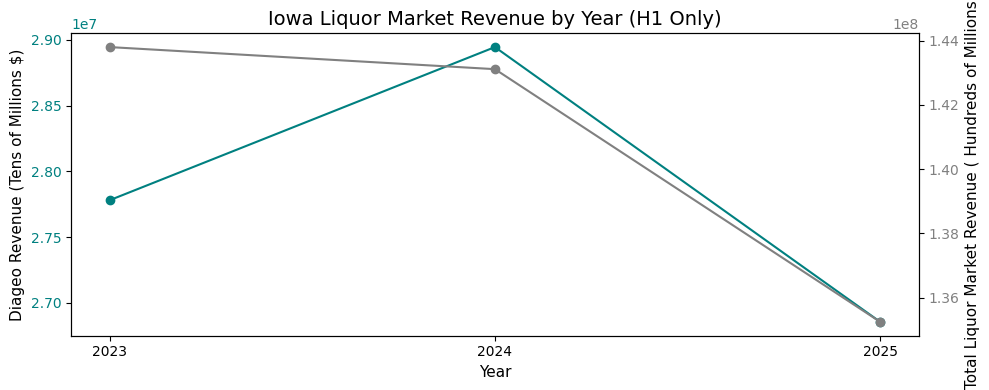

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Calculate the data table with Diageo vs Market Total Sales by years
Market_sale_by_half = df_clean[df_clean["Half"] == "H1"].groupby("Year").agg(
    Total_Market_Rev = ("Revenue","sum")
).sort_values(by = "Year", ascending = True).reset_index()
Diageo_by_half = Sale_by_half[["Year", "Total_Rev"]]

Total_market_trend = pd.merge(Market_sale_by_half, Diageo_by_half, how = "inner", on = "Year" )

Total_market_trend = Total_market_trend.rename(columns={
    "Total_Market_Rev": "Total Liquor Market",
    "Total_Rev": "Diageo Revenue"
})

Total_market_trend["Year"] = Total_market_trend["Year"].astype(int)

# Draw chart
fig, ax1 = plt.subplots(figsize=(10, 4))

# Diageo Revenue
ax1.plot(Total_market_trend["Year"], Total_market_trend["Diageo Revenue"], color="teal", marker="o", label="Diageo Revenue")
ax1.set_ylabel("Diageo Revenue (Tens of Millions $)", fontsize=11)
ax1.set_xlabel("Year", fontsize=11)
ax1.tick_params(axis="y", labelcolor="teal")

# Market Revenue
ax2 = ax1.twinx()
ax2.plot(Total_market_trend["Year"], Total_market_trend["Total Liquor Market"], color="gray", marker="o", label="Total Liquor Market")
ax2.set_ylabel("Total Liquor Market Revenue ( Hundreds of Millions $)", fontsize=11)
ax2.tick_params(axis="y", labelcolor="gray")

# Format x and title
ax1.set_xticks(Total_market_trend["Year"])  # Giữ nguyên 2023, 2024, 2025
ax1.set_title("Iowa Liquor Market Revenue by Year (H1 Only)", fontsize=14)
plt.tight_layout()
plt.show()


Both Diageo and the total Iowa liquor market experienced a revenue decline in H1 2025 compared to the previous year. This suggests a broader market contraction rather than a company-specific issue.

### Analyze market share dynamics and detect potential share loss to competitors.

In [15]:
# Calculate market sale by category by year and YoY growth
Market_sale_by_category = df_clean[(df_clean["Half"]=="H1") & (df_clean["Year"].isin({2024, 2025}))].groupby(["Alcohol Type", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Market_sale_by_category_pivot = Market_sale_by_category.pivot(
    index = "Alcohol Type",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Market_sale_by_category_pivot["%_Contribution"] = round((Market_sale_by_category_pivot[2025]/(Market_sale_by_category_pivot[2025].sum()))*100, 2)
Market_sale_by_category_pivot["Market_YoY_Growth"] = round(((Market_sale_by_category_pivot[2025] - Market_sale_by_category_pivot[2024])/Market_sale_by_category_pivot[2024])*100, 2)
Market_yoy = Market_sale_by_category_pivot[["Alcohol Type", "Market_YoY_Growth"]]

# Merge 2 tables
Sale_by_category = pd.merge(Sale_by_category_Diageo_pivot, Market_yoy, how = "inner", on = "Alcohol Type" )
Sale_by_category.head(10)

Year,Alcohol Type,2024,2025,%_Contribution,Diageo_YoY_Growth,Market_YoY_Growth
0,Whiskey,13170205.77,11472440.71,42.72,-12.89,-6.40
1,Rum,5662629.40,5244761.93,19.53,-7.38,-7.52
2,Tequila & Mezcal,3388754.07,3578314.22,13.32,5.59,-3.17
3,Vodka,3597941.98,3539310.09,13.18,-1.63,-3.85
4,Liqueur,828635.33,841528.38,3.13,1.56,-5.49
5,Gin,867380.61,802597.02,2.99,-7.47,-7.64
6,Schnapps,662787.18,698249.11,2.60,5.35,3.80
7,Ready-to-Drink/Cocktails,173914.97,342515.83,1.28,96.94,14.43
8,Other,517289.49,275693.53,1.03,-46.70,-14.43
9,Spirits,69163.49,55567.80,0.21,-19.66,-14.49


Key categories, including whiskey, rum, and vodka, which together account for ~63% of total revenue, all experienced a decline in H1 2025 compared to the same period last year. Whiskey — the largest category — where Diageo’s revenue dropped -13.3%, significantly more than the -6.3% decline in the total market - signaling a share lost possibility.

On the other hand, certain categories are showing positive growth signals:
- Tequila & Mezcal (13% of revenue) increased +5.6% for Diageo, despite a -3.2% drop in the total market → indicating share gain.
- Ready-to-drink Cocktails (1.3% of revenue) grew +96.9% for Diageo and +14.4% marketwide → signaling strong consumer momentum.

These trends highlight both risks and opportunities:
- Risks: Weak performance in core categories may lead to share loss, especially if competitors are better defending or gaining.
- Opportunities: Emerging categories like tequila and RTD Cocktails could offer growth upside if I can identify and double down on high-performing variants or stores.

Next, I will dive deeper into each category to pinpoint:
- For declining categories (whiskey, rum, vodka): which variants are driving the drop, in which regions, and whether competitors are gaining with specific SKUs.
- For growing categories (tequila, RTD): where growth is coming from, which variants are leading, and how Diageo compares to top competitors.

### Whiskey

In [16]:
category_to_check = "Whiskey"  
# ----------------- VARIANT ----------------- 
whiskey_variant_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                        (df_Diageo["Year"].isin([2024, 2025])) & 
                        (df_Diageo["Alcohol Type"] == category_to_check)].groupby(["Variant", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

whiskey_variant_pivot = whiskey_variant_yoy.pivot(index="Variant", columns="Year", values="Total_Rev").fillna(0)
whiskey_variant_pivot["%_Contribution"] = round((whiskey_variant_pivot[2025] /(whiskey_variant_pivot[2025].sum())) * 100, 2)
whiskey_variant_pivot["YoY_Growth"] = round(((whiskey_variant_pivot[2025] - whiskey_variant_pivot[2024]) / whiskey_variant_pivot[2024]) * 100, 2)
whiskey_variant_pivot = whiskey_variant_pivot.sort_values(by="YoY_Growth")  

# ----------------- STORE -----------------
whiskey_store_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                     (df_Diageo["Year"].isin([2024, 2025])) & 
                     (df_Diageo["Alcohol Type"] == category_to_check)].groupby(["Store Name", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

whiskey_store_pivot = whiskey_store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0)
whiskey_store_pivot["%_Contribution"] = round((whiskey_store_pivot[2025]/(whiskey_store_pivot[2025].sum())) * 100, 2)
whiskey_store_pivot["YoY_Growth"] = round(((whiskey_store_pivot[2025] - whiskey_store_pivot[2024]) / whiskey_store_pivot[2024]) * 100, 2)
whiskey_store_pivot = whiskey_store_pivot.sort_values(by="YoY_Growth")

# ----------------- MARKET SHARE CHANGE YOY -----------------
# Filter Whiskey H1 data
df_whiskey = df_clean[(df_clean["Half"] == "H1") & (df_clean["Year"].isin([2024, 2025])) & (df_clean["Alcohol Type"] == "Whiskey")]

# Calculate share in whiskey category by year
total_whiskey_rev = df_whiskey.groupby("Year")["Revenue"].sum()

rev_by_manu = df_whiskey.groupby(["Manufacturer Name", "Year"]).agg(
    Total_Rev=("Revenue", "sum")
).reset_index()

manu_pivot = rev_by_manu.pivot(index="Manufacturer Name", columns="Year", values="Total_Rev").fillna(0)

manu_pivot["2024_Share"] = round((manu_pivot[2024] / total_whiskey_rev[2024]) * 100, 2)
manu_pivot["2025_Share"] = round((manu_pivot[2025] / total_whiskey_rev[2025]) * 100, 2)
manu_pivot["%_Contribution"] = round((manu_pivot[2025] /(manu_pivot[2025].sum())) * 100, 2)

manu_pivot["Share_Change"] = manu_pivot["2025_Share"] - manu_pivot["2024_Share"]

# Only show top 10 manufacturers since they are the main players and have big impact to the market
top10_2024 = manu_pivot.sort_values(by=2024, ascending=False).head(10)
top_whiskey_gain = top10_2024.sort_values(by="Share_Change", ascending=False)

# ----------------- DISPLAY ----------------- #
display(whiskey_variant_pivot.sort_values(by = "%_Contribution", ascending = False).head(10)) # % Growth yoy of top 10 variants
display(whiskey_store_pivot.sort_values(by = "%_Contribution", ascending = False).head(15))  # % Growth yoy of top 10 stores
display(top_whiskey_gain[["2024_Share", "2025_Share", "Share_Change"]].head(10)) # Top 10 manufacturers

Year,2024,2025,%_Contribution,YoY_Growth
Variant,,,,
Crown Royal Regal Apple,3018992.36,2839559.04,24.75,-5.94
Crown Royal,2934226.12,2819465.95,24.58,-3.91
Crown Royal Blackberry,1916099.46,1346781.63,11.74,-29.71
Crown Royal Peach,1635652.17,1307363.67,11.40,-20.07
Seagrams 7 Crown,719117.06,633455.76,5.52,-11.91
Bulleit Bourbon,609671.00,605135.80,5.27,-0.74
Crown Royal Vanilla,345950.40,299490.69,2.61,-13.43
Johnnie Walker Black,219752.29,208415.70,1.82,-5.16
Johnnie Walker Red,203325.84,169934.45,1.48,-16.42


Year,2024,2025,%_Contribution,YoY_Growth
Store Name,,,,
Hy-Vee #3 / Bdi / Des Moines,455486.14,432211.46,3.77,-5.11
Central City 2,353721.20,319194.77,2.78,-9.76
Another Round / Dewitt,188459.72,190308.51,1.66,0.98
I-80 Liquor / Council Bluffs,173846.63,163738.65,1.43,-5.81
Benz Distributing,123939.83,124397.03,1.08,0.37
Wall To Wall Wine And Spirits / West Des Moines,75735.77,101784.07,0.89,34.39
Hy-Vee Wine And Spirits #1 (1281) / Iowa City,91992.27,88268.09,0.77,-4.05
Wilkie Liquors,91850.73,86263.99,0.75,-6.08
Sam'S Club 8162 / Cedar Rapids,58518.78,74007.75,0.65,26.47


Year,2024_Share,2025_Share,Share_Change
Manufacturer Name,,,
Sazerac Company Inc,21.16,22.26,1.10
Jim Beam Brands,11.25,12.05,0.80
Pernod Ricard Usa,5.95,6.23,0.28
Brown Forman Corp.,10.57,10.73,0.16
Cedar Ridge Vineyards Ll,1.36,1.52,0.16
Campari America,0.97,0.96,-0.01
Luxco Inc,1.09,1.02,-0.07
Kirin Beer & Spirits Of America Inc / Four Roses Distillery,1.30,1.19,-0.11
Heaven Hill Brands,12.21,11.54,-0.67


**1.Variant Performance**

Whiskey shows an overall revenue decline among top variants. 
- The top 3 Crown Royal variants (Regal Apple, Original, Peach), which account for ~70% of total whiskey revenue, all declined YoY — with Crown Royal Peach dropping by over $300K. These 3 variants should be 1st priority for investigation and promotional efforts.
- Other Crown Royal variants also show downward trends.
- Johnnie Walker Black and Red are both declining and require attention.

**2. Store-Level Insights**

At the store level, performance mirrors the overall trend: revenue decline is broad-based and not concentrated in just a few key accounts. Among the top 10 stores (collectively contributing ~36%), performance is mixed, with both increases and decreases observed.

**3. Market Share Dynamics**

Among the top 10 manufacturers, Diageo shows the largest share decline (-1.64pp) in H1 2025.Key competitors Sazerac (+1.11pp) and Jim Beam (+0.80pp) gained share and should be examined closely.


Next, I will identify which whiskey variants are gaining traction in the market and which competitors are driving that momentum.


In [17]:
category_to_check = "Whiskey"

variant_yoy = (
    df_clean[(df_clean["Half"] == "H1") & 
             (df_clean["Year"].isin([2024, 2025])) & 
             (df_clean["Alcohol Type"] == category_to_check)]
    .groupby(["Variant", "Manufacturer Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index())

variant_pivot = (variant_yoy.pivot(index=["Variant", "Manufacturer Name"], columns="Year", values="Total_Rev").fillna(0).reset_index())

variant_pivot["%_Contribution"] = round((variant_pivot[2025] / variant_pivot[2025].sum()) * 100, 2)
variant_pivot["YoY_Growth"] = round(((variant_pivot[2025] - variant_pivot[2024]) / variant_pivot[2024]) * 100, 2)
variant_pivot = variant_pivot.sort_values("YoY_Growth")


store_yoy = (
    df_clean[(df_clean["Half"] == "H1") & 
             (df_clean["Year"].isin([2024, 2025])) & 
             (df_clean["Alcohol Type"] == category_to_check)]
    .groupby(["Store Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index())

store_pivot = (
    store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0).reset_index())

store_pivot["%_Contribution"] = round((store_pivot[2025] / store_pivot[2025].sum()) * 100, 2)
store_pivot["YoY_Growth"] = round(((store_pivot[2025] - store_pivot[2024]) / store_pivot[2024]) * 100, 2)
store_pivot = store_pivot.sort_values("YoY_Growth")

display(variant_pivot.sort_values("%_Contribution", ascending=False).head(10))
display(store_pivot.sort_values("%_Contribution", ascending=False).head(15))


Year,Variant,Manufacturer Name,2024,2025,%_Contribution,YoY_Growth
136,Black Velvet,Heaven Hill Brands,3817420.75,3462583.25,6.71,-9.30
422,Fireball Cinnamon Whiskey,Sazerac Company Inc,3573360.99,3386731.77,6.56,-5.22
331,Crown Royal Regal Apple,Diageo Americas,3018992.36,2839559.04,5.50,-5.94
317,Crown Royal,Diageo Americas,2934226.12,2819465.95,5.47,-3.91
655,Jack Daniels Old #7 Black Label,Brown Forman Corp.,2879774.90,2643937.40,5.13,-8.19
674,Jameson,Pernod Ricard Usa,2256410.46,2100584.72,4.07,-6.91
425,Fireball Cinnamon Whiskey Mini Sleeve,Sazerac Company Inc,1615286.40,1847212.11,3.58,14.36
697,Jim Beam,Jim Beam Brands,1343313.30,1458200.94,2.83,8.55
321,Crown Royal Blackberry,Diageo Americas,1916099.46,1346781.63,2.61,-29.71
329,Crown Royal Peach,Diageo Americas,1635652.17,1307363.67,2.53,-20.07


Year,Store Name,2024,2025,%_Contribution,YoY_Growth
1094,Hy-Vee #3 / Bdi / Des Moines,1435100.10,1409753.08,2.73,-1.77
709,Central City 2,1254022.30,1256154.01,2.43,0.17
36,Another Round / Dewitt,732437.51,684309.79,1.33,-6.57
2153,Wall To Wall Wine And Spirits / West Des Moines,555749.87,586159.11,1.14,5.47
62,Benz Distributing,511190.70,503816.44,0.98,-1.44
1263,Hy-Vee Wine And Spirits #1 (1281) / Iowa City,550368.14,505534.12,0.98,-8.15
1284,I-80 Liquor / Council Bluffs,463444.58,449045.10,0.87,-3.11
756,Costco Wholesale #788 / Wdm,487217.33,398783.58,0.77,-18.15
1096,Hy-Vee #3 Food & Drugstore / Davenport,260159.54,373983.59,0.72,43.75
1789,Sam'S Club 8162 / Cedar Rapids,318617.33,317245.57,0.61,-0.43


**1. Variant Performance**

Whiskey shows an overall revenue decline among top Diageo variants.
- The top 3 variants — Crown Royal Regal Apple, Crown Royal, and Crown Royal Peach — together contribute 13.8% of total whiskey revenue and all declined YoY. Notably, Crown Royal Peach dropped -20.1% YoY, losing over $328K — the steepest fall among the top 10.
- While competitors also faced pressure (Black Velvet -9.3%, Jack Daniel’s -8.2%, Jameson -6.9%), Sazerac’s Fireball Mini Sleeve and Jim Beam grew +14.4% and +8.6%, respectively — signaling possible share shift.

These data points suggest that Diageo is losing ground, while rivals are capturing growth pockets. The three Crown Royal variants should be top priority for root-cause analysis and commercial defense.

**2. Store-Level Insights**
Similar to the total level, decline is broad-based across retail.
- Hy-Vee #3 / Des Moines and Central City 2 remain Diageo’s top whiskey outlets (combined 5.2% share), both seeing slight declines (-2.7% and -0.6%).
- Among top 15 stores, 9 declined, including heavy losses at Costco WDM (-19.4%) and Hy-Vee Iowa City (-8.6%), while some like Hy-Vee Davenport grew strongly (+42.9%).

-> Revenue pressure is not concentrated in a few stores, but widespread, with a handful of stores showing positive momentum. This suggests channel fragmentation and the need for localized interventions, not just top-store targeting.

### Rum

In [18]:
category_to_check = "Rum"  

# ----------------- VARIANT ----------------- 
rum_variant_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                        (df_Diageo["Year"].isin([2024, 2025])) & 
                        (df_Diageo["Alcohol Type"] == category_to_check)
                       ].groupby(["Variant", "Year"]).agg(Total_Rev = ("Revenue", "sum")).reset_index()

rum_variant_pivot = rum_variant_yoy.pivot(index="Variant", columns="Year", values="Total_Rev").fillna(0)
rum_variant_pivot["%_Contribution"] = round((rum_variant_pivot[2025] /(rum_variant_pivot[2025].sum())) * 100, 2)
rum_variant_pivot["YoY_Growth"] = round(((rum_variant_pivot[2025] - rum_variant_pivot[2024]) / rum_variant_pivot[2024]) * 100, 2)
rum_variant_pivot = rum_variant_pivot.sort_values(by="YoY_Growth")  

# ----------------- STORE -----------------
rum_store_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                     (df_Diageo["Year"].isin([2024, 2025])) & 
                     (df_Diageo["Alcohol Type"] == category_to_check)
                    ].groupby(["Store Name", "Year"]).agg(Total_Rev = ("Revenue", "sum")).reset_index()

rum_store_pivot = rum_store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0)
rum_store_pivot["%_Contribution"] = round((rum_store_pivot[2025]/(rum_store_pivot[2025].sum())) * 100, 2)
rum_store_pivot["YoY_Growth"] = round(((rum_store_pivot[2025] - rum_store_pivot[2024]) / rum_store_pivot[2024]) * 100, 2)
rum_store_pivot = rum_store_pivot.sort_values(by="YoY_Growth")

# ----------------- MARKET SHARE CHANGE YOY -----------------
# Filter Rum H1 data
df_rum = df_clean[(df_clean["Half"] == "H1") & (df_clean["Year"].isin([2024, 2025])) & (df_clean["Alcohol Type"] == "Rum")]

# Calculate share in rum category by year
total_rum_rev = df_rum.groupby("Year")["Revenue"].sum()

rev_by_manu = df_rum.groupby(["Manufacturer Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index()

manu_pivot = rev_by_manu.pivot(index="Manufacturer Name", columns="Year", values="Total_Rev").fillna(0)

manu_pivot["2024_Share"] = round((manu_pivot[2024] / total_rum_rev[2024]) * 100, 2)
manu_pivot["2025_Share"] = round((manu_pivot[2025] / total_rum_rev[2025]) * 100, 2)
manu_pivot["%_Contribution"] = round((manu_pivot[2025] /(manu_pivot[2025].sum())) * 100, 2)

manu_pivot["Share_Change"] = manu_pivot["2025_Share"] - manu_pivot["2024_Share"]

# Only show top 10 manufacturers since they are the main players and have big impact to the market
top10_2024 = manu_pivot.sort_values(by=2024, ascending=False).head(10)
top_rum_gain = top10_2024.sort_values(by="Share_Change", ascending=False)

# ----------------- DISPLAY ----------------- #
display(rum_variant_pivot.sort_values(by = "%_Contribution", ascending = False).head(10)) # % Growth yoy of top 10 variants
display(rum_store_pivot.sort_values(by = "%_Contribution", ascending = False).head(15))  # % Growth yoy of top 10 stores
display(top_rum_gain[["2024_Share", "2025_Share", "Share_Change"]].head(10)) # Top 10 manufacturers



Year,2024,2025,%_Contribution,YoY_Growth
Variant,,,,
Captain Morgan Original Spiced,2669781.28,2623004.20,50.01,-1.75
Captain Morgan Original Spiced Barrel,2172588.93,1869117.12,35.64,-13.97
Captain Morgan Original Spiced Pet,297265.40,250532.75,4.78,-15.72
Captain Morgan Original Spiced Mini,186619.20,188995.20,3.60,1.27
Captain Morgan Private Stock,129577.92,92441.55,1.76,-28.66
Captain Morgan 100Prf Spiced Rum,73808.84,62610.03,1.19,-15.17
Captain Morgan Sweet Chili Lime,0.00,47544.90,0.91,inf
Captain Morgan Sliced Apple,42249.48,27454.57,0.52,-35.02
Captain Morgan White,27629.70,20270.04,0.39,-26.64


Year,2024,2025,%_Contribution,YoY_Growth
Store Name,,,,
Hy-Vee #3 / Bdi / Des Moines,197300.82,182960.72,3.49,-7.27
Central City 2,147357.54,136402.52,2.60,-7.43
Another Round / Dewitt,127166.40,109627.68,2.09,-13.79
Benz Distributing,75280.99,77699.35,1.48,3.21
I-80 Liquor / Council Bluffs,63014.76,73765.83,1.41,17.06
Hy-Vee Wine And Spirits #1 (1281) / Iowa City,53571.48,58536.84,1.12,9.27
Wilkie Liquors,59739.66,54505.14,1.04,-8.76
Hy-Vee #3 Food & Drugstore / Davenport,18156.90,43837.74,0.84,141.44
Happy'S Wine & Spirits Wholesale,36749.27,39749.40,0.76,8.16


Year,2024_Share,2025_Share,Share_Change
Manufacturer Name,,,
Heaven Hill Brands,8.51,8.77,0.26
Sazerac Company Inc,3.02,3.17,0.15
Diageo Americas,47.28,47.35,0.07
Proximo,1.04,1.02,-0.02
Bacardi Usa Inc,15.72,15.69,-0.03
Luxco Inc,3.22,3.14,-0.08
William Grant & Sons Inc,1.00,0.91,-0.09
"Sovereign Brands, Llc",0.81,0.71,-0.10
Jim Beam Brands,1.84,1.61,-0.23


**1. Variant Performance**

- Rum's hero brand - Captain Morgan (~99% Rum sale) is facing broad-based declines across key variants.
- The top 2 variants — Original Spiced and Barrel — contribute over 85% of total revenue, yet all declined YoY, with Spiced (-1.7%) and Barrel (-14%). These variants should be prioritized for diagnosis and corrective actions.
- While Original Spiced Mini and Sweet Chili Lime saw small gains, their scale is limited (<5% contribution each).
- Premium variants like Private Stock and Sliced Apple also declined significantly, suggesting challenges in higher-end offerings.


**2. Store-Level Insights**

Rum revenue pressure is not concentrated, but fragmented across the retail landscape.
- Even the top 2 stores — Hy-Vee #3 / Des Moines and Central City 2 — together account for just ~6% of total rum revenue, and both declined ~7%.
- Among top stores, performance is mixed, with some like Hy-Vee / Davenport (+141%) and Wall to Wall / West Des Moines (+76%) growing sharply.
 -> This dispersion suggests that top-store targeting is insufficient — success will require localized interventions.


**3. Market Share Landscape**

- Diageo maintains a dominant 47% share in the rum segment, with a marginal gain of +0.07ppts YoY.
- Meanwhile, competitors like Heaven Hill (+0.26ppts) and Sazerac (+0.15ppts) are growing share faster, suggesting emerging threats that warrant close competitive monitoring.


Next, I will identify which rum variants are gaining traction in the market and which competitors are driving that momentum.

In [19]:
category_to_check = "Rum"

variant_yoy = (
    df_clean[(df_clean["Half"] == "H1") & 
             (df_clean["Year"].isin([2024, 2025])) & 
             (df_clean["Alcohol Type"] == category_to_check)]
    .groupby(["Variant", "Manufacturer Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index())

variant_pivot = (variant_yoy.pivot(index=["Variant", "Manufacturer Name"], columns="Year", values="Total_Rev").fillna(0).reset_index())

variant_pivot["%_Contribution"] = round((variant_pivot[2025] / variant_pivot[2025].sum()) * 100, 2)
variant_pivot["YoY_Growth"] = round(((variant_pivot[2025] - variant_pivot[2024]) / variant_pivot[2024]) * 100, 2)
variant_pivot = variant_pivot.sort_values("YoY_Growth")


store_yoy = (
    df_clean[(df_clean["Half"] == "H1") & 
             (df_clean["Year"].isin([2024, 2025])) & 
             (df_clean["Alcohol Type"] == category_to_check)].groupby(["Store Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index())

store_pivot = (store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0).reset_index())

store_pivot["%_Contribution"] = round((store_pivot[2025] / store_pivot[2025].sum()) * 100, 2)
store_pivot["YoY_Growth"] = round(((store_pivot[2025] - store_pivot[2024]) / store_pivot[2024]) * 100, 2)
store_pivot = store_pivot.sort_values("YoY_Growth")

#Top variants by contribution
display(variant_pivot.sort_values("%_Contribution", ascending=False).head(10))
# Top variants by YoY growth
top20_contrib_with_growth=(variant_pivot.sort_values("%_Contribution", ascending=False).head(20).sort_values("YoY_Growth", ascending=False))
display(top20_contrib_with_growth.head(10))
# Top stores by contribution
display(store_pivot.sort_values("%_Contribution", ascending=False).head(15))


Year,Variant,Manufacturer Name,2024,2025,%_Contribution,YoY_Growth
72,Captain Morgan Original Spiced,Diageo Americas,2669781.28,2623004.20,23.68,-1.75
73,Captain Morgan Original Spiced Barrel,Diageo Americas,2172588.93,1869117.12,16.88,-13.97
175,Malibu Coconut,Pernod Ricard Usa,1473099.79,1279671.99,11.55,-13.13
30,Bacardi Superior,Bacardi Usa Inc,872179.53,798556.23,7.21,-8.44
6,Admiral Nelson Spiced,Heaven Hill Brands,828647.75,796323.50,7.19,-3.90
32,Bacardi Superior Pet,Bacardi Usa Inc,305877.13,293357.10,2.65,-4.09
25,Bacardi Limon,Bacardi Usa Inc,276852.34,253487.87,2.29,-8.44
75,Captain Morgan Original Spiced Pet,Diageo Americas,297265.40,250532.75,2.26,-15.72
204,Paramount White Rum,Luxco Inc,217602.50,197394.50,1.78,-9.29
74,Captain Morgan Original Spiced Mini,Diageo Americas,186619.20,188995.20,1.71,1.27


Year,Variant,Manufacturer Name,2024,2025,%_Contribution,YoY_Growth
69,Calypso Spiced Rum,Sazerac Company Inc,63864.00,69075.00,0.62,8.16
187,Members Mark Spiced Rum,Sazerac Company Inc,66147.84,68951.52,0.62,4.24
74,Captain Morgan Original Spiced Mini,Diageo Americas,186619.20,188995.20,1.71,1.27
72,Captain Morgan Original Spiced,Diageo Americas,2669781.28,2623004.20,23.68,-1.75
9,Admiral Nelson Spiced Pet,Heaven Hill Brands,80964.00,79303.00,0.72,-2.05
6,Admiral Nelson Spiced,Heaven Hill Brands,828647.75,796323.50,7.19,-3.90
32,Bacardi Superior Pet,Bacardi Usa Inc,305877.13,293357.10,2.65,-4.09
30,Bacardi Superior,Bacardi Usa Inc,872179.53,798556.23,7.21,-8.44
25,Bacardi Limon,Bacardi Usa Inc,276852.34,253487.87,2.29,-8.44
204,Paramount White Rum,Luxco Inc,217602.50,197394.50,1.78,-9.29


Year,Store Name,2024,2025,%_Contribution,YoY_Growth
1081,Hy-Vee #3 / Bdi / Des Moines,393711.38,355947.13,3.21,-9.59
703,Central City 2,320760.41,290127.22,2.62,-9.55
34,Another Round / Dewitt,234891.74,199450.90,1.80,-15.09
59,Benz Distributing,148004.46,147962.78,1.34,-0.03
1247,Hy-Vee Wine And Spirits #1 (1281) / Iowa City,136105.52,128469.62,1.16,-5.61
1268,I-80 Liquor / Council Bluffs,118512.28,128521.53,1.16,8.45
2144,Wilkie Liquors,100943.10,95782.17,0.86,-5.11
2117,Wall To Wall Wine And Spirits / West Des Moines,80821.15,91222.23,0.82,12.87
1083,Hy-Vee #3 Food & Drugstore / Davenport,48334.35,91087.07,0.82,88.45
1164,Hy-Vee Food Store #1 (1410) / Mason City,74189.33,85291.43,0.77,14.96


**1. Variant Performance**

Rum revenue decline is broad-based, with Diageo particularly exposed due to underperformance of its flagship Captain Morgan variants.
- Captain Morgan Original Spiced (23.7% share) fell –1.75%, while PET and Barrel formats declined –15.7% and –14%, losing over $380K combined. These 3 variants account for ~40% of Diageo’s total rum revenue.
- Other large brands also declined: Malibu Coconut –13.1%, Bacardi Superior –8.4%, Admiral Nelson Spiced –3.9%.

However, a few variants are gaining traction:
- Calypso Spiced (+8.2%) and Members Mark Spiced (+4.2%)—both owned by Sazerac—are growing and may be capturing share in value-driven or private label segments.
- Captain Morgan Mini (+1.3%) also shows slight growth, suggesting potential in smaller formats.

-> Diageo should revisit its rum pack and pricing strategy, as Sazerac is gaining share with value-focused SKUs like Calypso and private labels such as Members Mark. Competitive pressure is rising in low-cost and store-brand segments.

**2. Store-Level**

Rum revenue pressure is not driven by a few key accounts—it’s distributed across the channel.
- Top 2 stores represent only 5.8% of Diageo’s rum revenue.
- Among the top 10 stores (~16% total revenue), performance is mixed:
 ↳ Hy-Vee #3 and Central City 2 declined (–17%, –25%).
 ↳ Hy-Vee Davenport and Hy-Vee Iowa City #1 grew (+88%, +46%), suggesting pockets of opportunity.

-> Similar to whiskey, rum's store sale is decentralized and need localized interventions, not just top-store targeting.

### Vodka

In [20]:
category_to_check = "Vodka"  

# ----------------- VARIANT ----------------- 
vodka_variant_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                        (df_Diageo["Year"].isin([2024, 2025])) & 
                        (df_Diageo["Alcohol Type"] == category_to_check)
                       ].groupby(["Variant", "Year"]).agg(Total_Rev = ("Revenue", "sum")).reset_index()

vodka_variant_pivot = vodka_variant_yoy.pivot(index="Variant", columns="Year", values="Total_Rev").fillna(0)
vodka_variant_pivot["%_Contribution"] = round((vodka_variant_pivot[2025] /(vodka_variant_pivot[2025].sum())) * 100, 2)
vodka_variant_pivot["YoY_Growth"] = round(((vodka_variant_pivot[2025] - vodka_variant_pivot[2024]) / vodka_variant_pivot[2024]) * 100, 2)
vodka_variant_pivot = vodka_variant_pivot.sort_values(by="YoY_Growth")  

# ----------------- STORE -----------------
vodka_store_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                     (df_Diageo["Year"].isin([2024, 2025])) & 
                     (df_Diageo["Alcohol Type"] == category_to_check)
                    ].groupby(["Store Name", "Year"]).agg(Total_Rev = ("Revenue", "sum")).reset_index()

vodka_store_pivot = vodka_store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0)
vodka_store_pivot["%_Contribution"] = round((vodka_store_pivot[2025]/(vodka_store_pivot[2025].sum())) * 100, 2)
vodka_store_pivot["YoY_Growth"] = round(((vodka_store_pivot[2025] - vodka_store_pivot[2024]) / vodka_store_pivot[2024]) * 100, 2)
vodka_store_pivot = vodka_store_pivot.sort_values(by="YoY_Growth")

# ----------------- MARKET SHARE CHANGE YOY -----------------
# Filter Vodka H1 data
df_vodka = df_clean[
    (df_clean["Half"] == "H1") & 
    (df_clean["Year"].isin([2024, 2025])) & 
    (df_clean["Alcohol Type"] == "Vodka") & 
    (df_clean["Manufacturer Name"].notna())]

# Calculate share in vodka category by year
total_vodka_rev = df_vodka.groupby("Year")["Revenue"].sum()

rev_by_manu = df_vodka.groupby(["Manufacturer Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index()

manu_pivot = rev_by_manu.pivot(index="Manufacturer Name", columns="Year", values="Total_Rev").fillna(0)

manu_pivot["2024_Share"] = round((manu_pivot[2024] / total_vodka_rev[2024]) * 100, 2)
manu_pivot["2025_Share"] = round((manu_pivot[2025] / total_vodka_rev[2025]) * 100, 2)
manu_pivot["%_Contribution"] = round((manu_pivot[2025] /(manu_pivot[2025].sum())) * 100, 2)

manu_pivot["Share_Change"] = manu_pivot["2025_Share"] - manu_pivot["2024_Share"]

# Only show top 10 manufacturers since they are the main players and have big impact to the market
top10_2024 = manu_pivot.sort_values(by=2024, ascending=False).head(10)
top_vodka_gain = top10_2024.sort_values(by="Share_Change", ascending=False)

# ----------------- DISPLAY ----------------- #
display(vodka_variant_pivot.sort_values(by = "%_Contribution", ascending = False).head(10)) # % Growth yoy of top 10 variants
display(vodka_store_pivot.sort_values(by = "%_Contribution", ascending = False).head(15))  # % Growth yoy of top 10 stores
display(top_vodka_gain[["2024_Share", "2025_Share", "Share_Change"]].head(10)) # Top 10 manufacturers

Year,2024,2025,%_Contribution,YoY_Growth
Variant,,,,
Smirnoff 80Prf Pet,853110.25,957624.00,27.06,12.25
Smirnoff 80Prf,775348.55,736024.22,20.80,-5.07
Ketel One,464425.83,482938.82,13.64,3.99
Smirnoff 80Prf Mini,129424.22,117845.43,3.33,-8.95
"Smirnoff Red, White & Berry",113197.75,103677.25,2.93,-8.41
Smirnoff Raspberry,97411.50,100424.50,2.84,3.09
Smirnoff Vanilla,68698.50,92730.00,2.62,34.98
Smirnoff Strawberry,64646.75,72189.25,2.04,11.67
Smirnoff Kissed Caramel,68829.75,49714.50,1.40,-27.77


Year,2024,2025,%_Contribution,YoY_Growth
Store Name,,,,
Central City 2,163217.23,165197.25,4.67,1.21
Hy-Vee #3 / Bdi / Des Moines,151329.58,138271.72,3.91,-8.63
Wall To Wall Wine And Spirits / West Des Moines,34080.96,75720.66,2.14,122.18
Hy-Vee Wine And Spirits #1 (1281) / Iowa City,35848.59,41666.85,1.18,16.23
Benz Distributing,21013.58,38212.16,1.08,81.85
Hy-Vee #2 (1018) / Ames,24659.97,33139.59,0.94,34.39
Hy-Vee Food Store (1148) / Fleur / Dsm,26889.36,32056.64,0.91,19.22
Hy-Vee / Waukee,25712.16,30416.71,0.86,18.30
Hy-Vee #4 / Wdm,27809.31,30319.10,0.86,9.02


Year,2024_Share,2025_Share,Share_Change
Manufacturer Name,,,
Sazerac Company Inc,10.57,13.83,3.26
Diageo Americas,11.75,12.02,0.27
Mccormick Distilling Co.,3.91,3.98,0.07
Bacardi Usa Inc,2.99,2.98,-0.01
E & J Gallo Winery,4.56,4.49,-0.07
Luxco Inc,6.40,6.26,-0.14
Pernod Ricard Usa,5.86,5.67,-0.19
Constellation Brands Inc,2.02,0.00,-2.02
Phillips Beverage,3.32,1.24,-2.08



**1. Variant Performance**

Smirnoff 80Prf PET has become the top-performing variant, contributing over 27% of vodka revenue and growing +12.3% YoY, while the regular 80Prf format (20.8% share) declined -5.1%, suggesting a shift in consumer preference toward PET packaging.
Among flavor variants, Smirnoff Vanilla (+35%) and Strawberry (+12%) show promising growth from a small base, while Red, White & Berry and Kissed Caramel decline.

**2. Store-Level Insights**

Revenue growth is broad-based, not concentrated in a few top stores. Only Central City 2 exceeds 4% of total revenue (4.67%) and remains flat (+1.2% YoY).
Performance is mixed: some mid-sized stores such as Wall to Wall Wine & Spirits and Benz Distributing are growing triple digits, while others like Hy-Vee #3 / Des Moines are declining.


**3. Market Share Landscape**

Sazerac posted the largest share gain in vodka, up +3.26 pp YoY, while Diageo gained slightly (+0.27 pp).
Fifth Generation (likely Tito’s) saw the sharpest drop (-5.68 pp), indicating significant share redistribution in the category.
Watchout: Closely monitor Sazerac’s product and pricing strategy to understand where they’re winning share.


I will next investigate the top-growing variants within the Vodka category to better identify Diageo’s key competitive threats.

In [21]:
category_to_check = "Vodka"

vodka_variant_yoy = (
    df_clean[(df_clean["Half"] == "H1") & 
             (df_clean["Year"].isin([2024, 2025])) & 
             (df_clean["Alcohol Type"] == category_to_check)]
    .groupby(["Variant", "Manufacturer Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index())

vodka_variant_pivot = (vodka_variant_yoy.pivot(index=["Variant", "Manufacturer Name"], columns="Year", values="Total_Rev").fillna(0).reset_index())

vodka_variant_pivot["%_Contribution"] = round((vodka_variant_pivot[2025] / vodka_variant_pivot[2025].sum()) * 100, 2)
vodka_variant_pivot["YoY_Growth"] = round(((vodka_variant_pivot[2025] - vodka_variant_pivot[2024]) / vodka_variant_pivot[2024]) * 100, 2)
vodka_variant_pivot = vodka_variant_pivot.sort_values("YoY_Growth")

vodka_store_yoy = (
    df_clean[(df_clean["Half"] == "H1") & 
             (df_clean["Year"].isin([2024, 2025])) & 
             (df_clean["Alcohol Type"] == category_to_check)]
    .groupby(["Store Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index())

vodka_store_pivot = (vodka_store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0).reset_index())

vodka_store_pivot["%_Contribution"] = round((vodka_store_pivot[2025] / vodka_store_pivot[2025].sum()) * 100, 2)
vodka_store_pivot["YoY_Growth"] = round(((vodka_store_pivot[2025] - vodka_store_pivot[2024]) / vodka_store_pivot[2024]) * 100, 2)
vodka_store_pivot = vodka_store_pivot.sort_values("YoY_Growth")

#Top variants by contribution
display(vodka_variant_pivot.sort_values("%_Contribution", ascending=False).head(10))
# Top variants by YoY growth
top20_vodka_contrib_with_growth=(vodka_variant_pivot.sort_values("%_Contribution", ascending=False).head(20).sort_values("YoY_Growth", ascending=False))
display(top20_vodka_contrib_with_growth.head(10))
# Top stores by contribution
display(vodka_store_pivot.sort_values("%_Contribution", ascending=False).head(15))

Year,Variant,Manufacturer Name,2024,2025,%_Contribution,YoY_Growth
439,Titos Handmade Vodka,Fifth Generation Inc,9946259.69,7882982.41,26.77,-20.74
438,Titos Handmade Vodka,"Fifth Generation Distilled Spirits, Inc.",0.00,1775993.24,6.03,inf
162,Hawkeye Vodka,Luxco Inc,1472017.62,1389585.73,4.72,-5.60
23,Absolut Swedish Vodka 80Prf,Pernod Ricard Usa,1044072.84,970687.03,3.30,-7.03
135,Fris Danish Vodka,Sazerac Company Inc,746655.64,958414.62,3.25,28.36
324,Smirnoff 80Prf Pet,Diageo Americas,853110.25,957624.00,3.25,12.25
146,Grey Goose,Bacardi Usa Inc,871964.25,849044.89,2.88,-2.63
220,Mccormick 80Prf Vodka Pet,Mccormick Distilling Co.,767456.72,754695.04,2.56,-1.66
322,Smirnoff 80Prf,Diageo Americas,775348.55,736024.22,2.50,-5.07
287,Platinum 7X Vodka,Sazerac Company Inc,536912.12,681597.16,2.31,26.95


Year,Variant,Manufacturer Name,2024,2025,%_Contribution,YoY_Growth
438,Titos Handmade Vodka,"Fifth Generation Distilled Spirits, Inc.",0.00,1775993.24,6.03,inf
201,Kirkland Signature American Vodka,Park Street Imports,0.00,362419.20,1.23,inf
402,Svedka 80Prf,Sazerac Company Inc,0.00,440463.86,1.50,inf
135,Fris Danish Vodka,Sazerac Company Inc,746655.64,958414.62,3.25,28.36
287,Platinum 7X Vodka,Sazerac Company Inc,536912.12,681597.16,2.31,26.95
324,Smirnoff 80Prf Pet,Diageo Americas,853110.25,957624.00,3.25,12.25
425,The Original Pickle Shot Dill Pickle Vodka,Park Street Imports,275463.02,293977.18,1.00,6.72
34,Barton Vodka,Sazerac Company Inc,413815.44,430753.76,1.46,4.09
177,Ketel One,Diageo Americas,464425.83,482938.82,1.64,3.99
220,Mccormick 80Prf Vodka Pet,Mccormick Distilling Co.,767456.72,754695.04,2.56,-1.66


Year,Store Name,2024,2025,%_Contribution,YoY_Growth
710,Central City 2,1060958.61,1030135.13,3.50,-2.91
1094,Hy-Vee #3 / Bdi / Des Moines,1095672.88,992195.05,3.37,-9.44
1263,Hy-Vee Wine And Spirits #1 (1281) / Iowa City,482247.62,472123.48,1.60,-2.10
37,Another Round / Dewitt,421895.18,412649.41,1.40,-2.19
63,Benz Distributing,297610.02,337754.39,1.15,13.49
757,Costco Wholesale #788 / Wdm,281392.62,237444.48,0.81,-15.62
1096,Hy-Vee #3 Food & Drugstore / Davenport,148060.00,238796.27,0.81,61.28
2146,Wall To Wall Wine And Spirits / West Des Moines,177855.91,232969.68,0.79,30.99
1284,I-80 Liquor / Council Bluffs,222019.07,227345.76,0.77,2.40
2172,Wilkie Liquors,187694.45,206927.65,0.70,10.25


**1. Variant Performance**

Vodka performance is under pressure from the top-selling variant, while Sazerac is gaining ground with strong growth across multiple SKUs.
- Tito’s Handmade Vodka declined by –20.7%, resulting in a revenue loss of over $2M. This variant still contributes approximately 33% of total vodka sales, highlighting the outsized impact of its decline. The drop is driven by SKUs from Fifth Generation Inc, although a new SKU from Fifth Generation Distilled Spirits, Inc. generated $1.8M in 2025, partially offsetting the loss.
- Diageo’s Smirnoff portfolio shows mixed performance. While Smirnoff 80Prf PET grew by +12.3%, the standard Smirnoff 80Prf SKU declined by –5.1%, suggesting shifting consumer preferences between formats or price tiers.
- Sazerac is gaining market momentum, with consistent double-digit growth across multiple brands. Frïs Danish Vodka grew by +28.4%, Platinum 7X Vodka by +27.0%, and Svedka 80Prf, a new entrant, contributed $440K in revenue.
- Other notable declines include Absolut (–7.0%), Hawkeye (–5.6%), Grey Goose (–2.6%), and McCormick (–1.7%).

→ Diageo faces increasing competition from Sazerac, which is expanding aggressively with well-performing value-tier and new entrants. Strategic focus should be placed on adjusting Smirnoff’s assortment and reinforcing value-based positioning to defend share.

**2. Store-Level Performance**

Vodka sales are spread across many stores. While top-performing outlets saw declines, several smaller stores recorded notable growth.
- The top two stores—Hy-Vee #3 (Des Moines) and Central City 2 — together contribute nearly 7% of total vodka revenue, yet both saw sales decline by –9.4% and –2.9%, respectively.
- Among the top 10 stores, most experienced flat or negative growth. However, some accounts posted strong gains, such as Benz Distributing (+13.5%), Hy-Vee #3 (Davenport) (+61.3%), and Wall to Wall Wine and Spirits (+31.0%).

→ Given the fragmented performance across stores — with underperformance in top outlets but signs of momentum in select smaller accounts — Diageo should move beyond one-size-fits-all recovery tactics. Instead, tailor interventions by store group:
- For declining high-volume stores, prioritize root-cause diagnosis (e.g. lost share, assortment gaps, execution).
- For growing smaller accounts, identify drivers and replicate success through similar store profiles.

### Tequila

In [22]:
category_to_check = "Tequila & Mezcal"  

# ----------------- VARIANT ----------------- 
tequila_variant_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                        (df_Diageo["Year"].isin([2024, 2025])) & 
                        (df_Diageo["Alcohol Type"] == category_to_check)
                       ].groupby(["Variant", "Year"]).agg(Total_Rev = ("Revenue", "sum")).reset_index()

tequila_variant_pivot = tequila_variant_yoy.pivot(index="Variant", columns="Year", values="Total_Rev").fillna(0)
tequila_variant_pivot["%_Contribution"] = round((tequila_variant_pivot[2025] /(tequila_variant_pivot[2025].sum())) * 100, 2)
tequila_variant_pivot["YoY_Growth"] = round(((tequila_variant_pivot[2025] - tequila_variant_pivot[2024]) / tequila_variant_pivot[2024]) * 100, 2)
tequila_variant_pivot = tequila_variant_pivot.sort_values(by="YoY_Growth")  

# ----------------- STORE -----------------
tequila_store_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                     (df_Diageo["Year"].isin([2024, 2025])) & 
                     (df_Diageo["Alcohol Type"] == category_to_check)
                    ].groupby(["Store Name", "Year"]).agg(Total_Rev = ("Revenue", "sum")).reset_index()

tequila_store_pivot = tequila_store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0)
tequila_store_pivot["%_Contribution"] = round((tequila_store_pivot[2025]/(tequila_store_pivot[2025].sum())) * 100, 2)
tequila_store_pivot["YoY_Growth"] = round(((tequila_store_pivot[2025] - tequila_store_pivot[2024]) / tequila_store_pivot[2024]) * 100, 2)
tequila_store_pivot = tequila_store_pivot.sort_values(by="YoY_Growth")

# ----------------- MARKET SHARE CHANGE YOY -----------------
# Filter Tequila H1 data
df_tequila = df_clean[
    (df_clean["Half"] == "H1") & 
    (df_clean["Year"].isin([2024, 2025])) & 
    (df_clean["Alcohol Type"] == "Tequila & Mezcal")]

# Calculate share in tequila category by year
total_tequila_rev = df_tequila.groupby("Year")["Revenue"].sum()

rev_by_manu = df_tequila.groupby(["Manufacturer Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index()

manu_pivot = rev_by_manu.pivot(index="Manufacturer Name", columns="Year", values="Total_Rev").fillna(0)

manu_pivot["2024_Share"] = round((manu_pivot[2024] / total_tequila_rev[2024]) * 100, 2)
manu_pivot["2025_Share"] = round((manu_pivot[2025] / total_tequila_rev[2025]) * 100, 2)
manu_pivot["%_Contribution"] = round((manu_pivot[2025] /(manu_pivot[2025].sum())) * 100, 2)

manu_pivot["Share_Change"] = manu_pivot["2025_Share"] - manu_pivot["2024_Share"]

# Only show top 10 manufacturers since they are the main players and have big impact to the market
top10_2024 = manu_pivot.sort_values(by=2024, ascending=False).head(10)
top_tequila_gain = top10_2024.sort_values(by="Share_Change", ascending=False)

# ----------------- DISPLAY ----------------- #
display(tequila_variant_pivot.sort_values(by = "%_Contribution", ascending = False).head(10)) # % Growth yoy of top 10 variants
display(tequila_store_pivot.sort_values(by = "%_Contribution", ascending = False).head(15))  # % Growth yoy of top 10 stores
display(top_tequila_gain[["2024_Share", "2025_Share", "Share_Change"]].head(10)) # Top 10 manufacturers

Year,2024,2025,%_Contribution,YoY_Growth
Variant,,,,
Don Julio Reposado,543082.66,1056965.78,29.54,94.62
Don Julio Blanco,768050.49,699204.73,19.54,-8.96
Don Julio Anejo,356441.45,412326.04,11.52,15.68
Casamigos Blanco,551193.49,387979.83,10.84,-29.61
Casamigos Reposado,321174.64,206161.04,5.76,-35.81
Don Julio 70Th Anniversary,195403.95,160556.00,4.49,-17.83
Astral Tequila,40460.88,130468.95,3.65,222.46
Don Julio 1942,166556.70,128822.82,3.60,-22.66
Astral Reposado,12979.20,44665.92,1.25,244.13


Year,2024,2025,%_Contribution,YoY_Growth
Store Name,,,,
Hy-Vee #3 / Bdi / Des Moines,340318.18,274339.35,7.67,-19.39
Central City 2,282111.45,252543.03,7.06,-10.48
Another Round / Dewitt,123862.44,106611.00,2.98,-13.93
Benz Distributing,94779.72,92202.32,2.58,-2.72
Hy-Vee Wine And Spirits #1 (1281) / Iowa City,65387.57,59389.12,1.66,-9.17
Sam'S Club 6344 / Windsor Heights,49621.62,57101.04,1.60,15.07
I-80 Liquor / Council Bluffs,48473.32,56427.58,1.58,16.41
"Central City Liquor, Inc.",27936.75,54533.70,1.52,95.20
H & A Mini Mart,41820.80,47683.56,1.33,14.02


Year,2024_Share,2025_Share,Share_Change
Manufacturer Name,,,
Diageo Americas,22.01,24.01,2.00
Campari America,2.33,3.19,0.86
"Mast-Jagermeister Us, Inc",4.29,4.87,0.58
Sazerac Company Inc,6.54,6.82,0.28
William Grant & Sons Inc,1.71,1.91,0.20
Pernod Ricard Usa,3.02,2.52,-0.50
Jim Beam Brands,5.51,5.00,-0.51
Luxco Inc,5.44,4.55,-0.89
Proximo,23.22,22.14,-1.08


**1. Variant Performance**

Don Julio Reposado drove tequila growth in 2025, nearly doubling YoY and contributing ~30% of total Diageo tequila revenue. Growth also came from:
- Don Julio Anejo (+15.7%), Astral Tequila (+222.5%), and Astral Reposado (+244.1%)
- Don Julio Reposado Mini grew +201.7%, signaling potential in small-format packs

However, some top variants saw contraction:
- Don Julio Blanco (–9%) and 70th Anniversary (–17.8%) declined
- Casamigos variants dropped sharply: Blanco (–29.6%), Reposado (–35.8%), collectively losing over $278K
→ Diageo should double down on Reposado and Astral SKUs, especially minis, while reviewing the Casamigos mix to manage losses.

**2. Store-Level**

Sales performance is mixed across outlets. Top stores underperformed - Hy-Vee #3 (–19.4%), Central City 2 (–10.5%), Another Round Dewitt (–13.9%). But some smaller stores show strong growth - Sam’s Club Davenport (+102.5%), Downtown Gas Dubuque (+232.5%), North Side Dubuque (+306.8%)

→ Should have tailored plans for group of stores.

**3. Market Share Landscape**

Diageo recorded the most notable gain in market share between 2024 and 2025, increasing by +2.0%, consolidating its leadership position. Other manufacturers showing positive momentum include Campari America (+0.86%), Mast-Jägermeister US (+0.58%), and Sazerac Company (+0.28%). Conversely, key competitors such as Bacardi USA (-2.06%) and Proximo (-1.08%) experienced significant declines. These shifts suggest opportunities for Diageo to further capitalize on weakened competitors, particularly in overlapping product segments.

Next, I will identify which tequila variants are gaining traction in the market and which competitors are driving that momentum.

In [23]:
category_to_check = "Tequila & Mezcal"

tequila_variant_yoy = (
    df_clean[(df_clean["Half"] == "H1") & 
             (df_clean["Year"].isin([2024, 2025])) & 
             (df_clean["Alcohol Type"] == category_to_check)]
    .groupby(["Variant", "Manufacturer Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index())

tequila_variant_pivot = (tequila_variant_yoy.pivot(index=["Variant", "Manufacturer Name"], columns="Year", values="Total_Rev").fillna(0).reset_index())

tequila_variant_pivot["%_Contribution"] = round((tequila_variant_pivot[2025] / tequila_variant_pivot[2025].sum()) * 100, 2)
tequila_variant_pivot["YoY_Growth"] = round(((tequila_variant_pivot[2025] - tequila_variant_pivot[2024]) / tequila_variant_pivot[2024]) * 100, 2)
tequila_variant_pivot = tequila_variant_pivot.sort_values("YoY_Growth")

tequila_store_yoy = (
    df_clean[(df_clean["Half"] == "H1") & 
             (df_clean["Year"].isin([2024, 2025])) & 
             (df_clean["Alcohol Type"] == category_to_check)]
    .groupby(["Store Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index())

tequila_store_pivot = (tequila_store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0).reset_index())

tequila_store_pivot["%_Contribution"] = round((tequila_store_pivot[2025] / tequila_store_pivot[2025].sum()) * 100, 2)
tequila_store_pivot["YoY_Growth"] = round(((tequila_store_pivot[2025] - tequila_store_pivot[2024]) / tequila_store_pivot[2024]) * 100, 2)
tequila_store_pivot = tequila_store_pivot.sort_values("YoY_Growth")

#Top variants by contribution
display(tequila_variant_pivot.sort_values("%_Contribution", ascending=False).head(10))
# Top variants by YoY growth
top20_tequila_contrib_with_growth=(tequila_variant_pivot.sort_values("%_Contribution", ascending=False).head(20).sort_values("YoY_Growth", ascending=False))
display(top20_tequila_contrib_with_growth.head(10))
# Top stores by contribution
display(tequila_store_pivot.sort_values("%_Contribution", ascending=False).head(15))



Year,Variant,Manufacturer Name,2024,2025,%_Contribution,YoY_Growth
429,Patron Silver,Bacardi Usa Inc,1961597.00,1630296.31,10.94,-16.89
183,Don Julio Reposado,Diageo Americas,543082.66,1056965.78,7.09,94.62
314,Jose Cuervo Especial Reposado,Proximo,1173292.54,1024132.16,6.87,-12.71
318,Jose Cuervo Especial Silver,Proximo,975783.35,917382.18,6.15,-5.99
180,Don Julio Blanco,Diageo Americas,768050.49,699204.73,4.69,-8.96
178,Don Julio Anejo,Diageo Americas,356441.45,412326.04,2.77,15.68
505,Teremana Blanco Tequila,"Mast-Jagermeister Us, Inc",383084.57,393177.52,2.64,2.63
97,Casamigos Blanco,Diageo Americas,551193.49,387979.83,2.60,-29.61
5,1800 Silver,Proximo,440894.50,375207.25,2.52,-14.90
383,Montezuma Gold,Sazerac Company Inc,322995.00,352326.00,2.36,9.08


Year,Variant,Manufacturer Name,2024,2025,%_Contribution,YoY_Growth
183,Don Julio Reposado,Diageo Americas,543082.66,1056965.78,7.09,94.62
220,Espolon Blanco,Campari America,177409.00,235950.50,1.58,33.00
316,Jose Cuervo Especial Reposado Mini,Proximo,145740.60,185948.73,1.25,27.59
507,Teremana Reposado Tequila,"Mast-Jagermeister Us, Inc",249254.83,296039.28,1.99,18.77
178,Don Julio Anejo,Diageo Americas,356441.45,412326.04,2.77,15.68
383,Montezuma Gold,Sazerac Company Inc,322995.00,352326.00,2.36,9.08
505,Teremana Blanco Tequila,"Mast-Jagermeister Us, Inc",383084.57,393177.52,2.64,2.63
398,Olmeca Altos Plata,Pernod Ricard Usa,181080.69,181864.62,1.22,0.43
294,Hornitos Reposado,Jim Beam Brands,182563.00,175922.00,1.18,-3.64
318,Jose Cuervo Especial Silver,Proximo,975783.35,917382.18,6.15,-5.99


Year,Store Name,2024,2025,%_Contribution,YoY_Growth
697,Central City 2,975751.75,893914.80,6.00,-8.39
1068,Hy-Vee #3 / Bdi / Des Moines,968959.65,881149.87,5.91,-9.06
33,Another Round / Dewitt,382468.84,336621.77,2.26,-11.99
58,Benz Distributing,267168.63,247533.50,1.66,-7.35
1229,Hy-Vee Wine And Spirits #1 (1281) / Iowa City,245352.04,207877.79,1.39,-15.27
2112,Wilkie Liquors,204149.24,184768.66,1.24,-9.49
1250,I-80 Liquor / Council Bluffs,199962.76,175326.73,1.18,-12.32
1730,Sam'S Club 6344 / Windsor Heights,204985.75,168450.25,1.13,-17.82
2086,Wall To Wall Wine And Spirits / West Des Moines,158005.88,151400.76,1.02,-4.18
1737,Sam'S Club 8238 / Davenport,115129.29,152393.88,1.02,32.37


**1. Variant Performance**

Tequila growth in 2025 was led by Don Julio Reposado, which nearly doubled YoY (+94.6%) and contributed 7.1% of total category revenue—the #1 variant by share. Other strong performers include:
- Don Julio Anejo (+15.7%) and mini-format Jose Cuervo Reposado Mini (+27.6%)
- Espolon Blanco (+33%) and Teremana Reposado (+18.8%) also posted solid gains

However, several high-volume variants underperformed:
- Jose Cuervo Especial Silver declined (–6%) despite being the #2 contributor (6.2%)
- Hornitos Reposado (–3.6%) and Don Julio 70th Anniversary (not shown but declining) weighed down overall growth

→ Diageo should continue prioritizing Don Julio Reposado and Anejo, especially as Reposado is outperforming the broader market. There is also upside in mini formats, as evidenced by Jose Cuervo Mini. Competitive pressure may emerge from Espolon and Teremana, which are expanding share from a smaller base.

**2. Store-Level**

Top outlets showed broad-based contraction - Central City 2 (–8.4%) and Hy-Vee #3 (–9.1%) together account for over 12% of category revenue but both declined. Most other top 10 stores also fell YoY, including I-80 Liquor (–12.3%) and Sam’s Club Windsor Heights (–17.8%)

Yet, certain stores delivered strong YoY gains. Marshall Beer Wine Spirits (+57.7%) and Hy-Vee #3 Food & Drugstore Davenport (+53.8%)

→ Tequila strategy should be tailored by store group:
 • For declining high-volume stores (e.g. Central City, Hy-Vee #3), review SKU assortment and promo support
 • For fast-growing accounts, consider reinforcing distribution of growth variants like Don Julio Reposado and Jose Cuervo Mini

### Ready-to-drink Cocktail

In [24]:
category_to_check = "Ready-to-Drink/Cocktails"  

# ----------------- VARIANT ----------------- 
RTDCocktail_variant_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                        (df_Diageo["Year"].isin([2024, 2025])) & 
                        (df_Diageo["Alcohol Type"] == category_to_check)
                       ].groupby(["Variant", "Year"]).agg(Total_Rev = ("Revenue", "sum")).reset_index()

RTDCocktail_variant_pivot = RTDCocktail_variant_yoy.pivot(index="Variant", columns="Year", values="Total_Rev").fillna(0)
RTDCocktail_variant_pivot["%_Contribution"] = round((RTDCocktail_variant_pivot[2025] /(RTDCocktail_variant_pivot[2025].sum())) * 100, 2)
RTDCocktail_variant_pivot["YoY_Growth"] = round(((RTDCocktail_variant_pivot[2025] - RTDCocktail_variant_pivot[2024]) / RTDCocktail_variant_pivot[2024]) * 100, 2)
RTDCocktail_variant_pivot = RTDCocktail_variant_pivot.sort_values(by="YoY_Growth")  

# ----------------- STORE -----------------
RTDCocktail_store_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                     (df_Diageo["Year"].isin([2024, 2025])) & 
                     (df_Diageo["Alcohol Type"] == category_to_check)
                    ].groupby(["Store Name", "Year"]).agg(Total_Rev = ("Revenue", "sum")).reset_index()

RTDCocktail_store_pivot = RTDCocktail_store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0)
RTDCocktail_store_pivot["%_Contribution"] = round((RTDCocktail_store_pivot[2025]/(RTDCocktail_store_pivot[2025].sum())) * 100, 2)
RTDCocktail_store_pivot["YoY_Growth"] = round(((RTDCocktail_store_pivot[2025] - RTDCocktail_store_pivot[2024]) / RTDCocktail_store_pivot[2024]) * 100, 2)
RTDCocktail_store_pivot = RTDCocktail_store_pivot.sort_values(by="YoY_Growth")

# ----------------- MARKET SHARE CHANGE YOY -----------------
# Filter RTDCocktail H1 data
df_RTDCocktail = df_clean[
    (df_clean["Half"] == "H1") & 
    (df_clean["Year"].isin([2024, 2025])) & 
    (df_clean["Alcohol Type"] == "Ready-to-Drink/Cocktails")]

# Calculate share in RTDCocktail category by year
total_RTDCocktail_rev = df_RTDCocktail.groupby("Year")["Revenue"].sum()

rev_by_manu = df_RTDCocktail.groupby(["Manufacturer Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index()

manu_pivot = rev_by_manu.pivot(index="Manufacturer Name", columns="Year", values="Total_Rev").fillna(0)

manu_pivot["2024_Share"] = round((manu_pivot[2024] / total_RTDCocktail_rev[2024]) * 100, 2)
manu_pivot["2025_Share"] = round((manu_pivot[2025] / total_RTDCocktail_rev[2025]) * 100, 2)
manu_pivot["%_Contribution"] = round((manu_pivot[2025] /(manu_pivot[2025].sum())) * 100, 2)

manu_pivot["Share_Change"] = manu_pivot["2025_Share"] - manu_pivot["2024_Share"]

# Only show top 10 manufacturers since they are the main players and have big impact to the market
top10_2024 = manu_pivot.sort_values(by=2024, ascending=False).head(10)
top_RTDCocktail_gain = top10_2024.sort_values(by="Share_Change", ascending=False)

# ----------------- DISPLAY ----------------- #
display(RTDCocktail_variant_pivot.sort_values(by = "%_Contribution", ascending = False).head(10)) # % Growth yoy of top 10 variants
display(RTDCocktail_store_pivot.sort_values(by = "%_Contribution", ascending = False).head(15))  # % Growth yoy of top 10 stores
display(top_RTDCocktail_gain[["2024_Share", "2025_Share", "Share_Change"]].head(10)) # Top 10 manufacturers

Year,2024,2025,%_Contribution,YoY_Growth
Variant,,,,
Bulleit Old Fashioned Cocktail,72035.06,111064.07,32.43,54.18
Crown Royal Whisky Sour Black Cherry Cocktail,0.00,47538.99,13.88,inf
Ketel One Espresso Martini Cocktail,12805.68,37725.03,11.01,194.60
Captain Morgan Long Island Iced Tea,36102.00,32626.00,9.53,-9.63
Bulleit Manhattan Cocktail,16140.91,26647.39,7.78,65.09
Ketel One Cosmo Cocktail,11778.15,25485.54,7.44,116.38
Sooh Ketel One Espresso Martini,0.00,19537.50,5.70,inf
Astral Margarita Cocktail,7954.62,17244.33,5.03,116.78
Tanqueray Negroni Cocktail,5207.55,10848.48,3.17,108.32


Year,2024,2025,%_Contribution,YoY_Growth
Store Name,,,,
Costco Wholesale #788 / Wdm,10240.68,15900.00,4.64,55.26
Costco Wholesale #1630 / Ankeny,4812.56,15450.00,4.51,221.03
Wall To Wall Wine And Spirits / West Des Moines,2417.76,11916.96,3.48,392.89
Hy-Vee / Waukee,2762.52,8545.56,2.49,209.34
Hy-Vee Wine And Spirits / Wdm,4398.20,6727.50,1.96,52.96
Hy-Vee Wine And Spirits / Bettendorf,1021.38,6291.00,1.84,515.93
Hy-Vee #4 / Wdm,2678.70,5934.54,1.73,121.55
Hy-Vee Food Store (1148) / Fleur / Dsm,317.64,5830.68,1.70,1735.63
Hy-Vee #3 Food & Drugstore / Davenport,2337.39,5464.80,1.60,133.80


Year,2024_Share,2025_Share,Share_Change
Manufacturer Name,,,
Sazerac Company Inc,20.38,28.55,8.17
Diageo Americas,5.99,10.31,4.32
Jim Beam Brands,13.93,15.13,1.20
Mississippi River Distilling Company Llc,1.35,0.95,-0.40
Phillips Beverage,1.42,0.26,-1.16
Mhw Ltd,3.26,1.84,-1.42
Pernod Ricard Usa,3.45,1.26,-2.19
Buzzballz Llc / Southern Champion,4.43,0.00,-4.43
Levecke Corporation,4.72,0.00,-4.72


**1. Variant Performance**

RTD Cocktail is showing robust growth, driven by a wave of new and scaling innovations.
- Growth is anchored in Diageo’s premium offerings, with Bulleit Old Fashioned (+54%) and Ketel One Espresso Martini (+195%) leading gains.
- Several new SKUs (e.g., Crown Royal Black Cherry, Sooh Ketel One) entered in 2025 and already contribute meaningful volume (~20% combined share).
→ Diageo should double down on premium and indulgent cocktail variants, as consumer appetite for these styles appears to be strong. However, underperforming legacy variants like Captain Morgan Long Island Iced Tea (-9.6%) should be evaluated for repositioning or rationalization.

**2. Store-Level Insights**

RTD Cocktail growth is widespread but uneven across the retail network.
- Most top outlets grew >100%, with standout performance from Hy-Vee Fleur (+1735%) and Wall to Wall WDM (+393%).
- New distribution at Fareway Norwalk and breakout growth in underpenetrated stores suggest whitespace opportunities are being captured.
→ Tailored store strategies are critical — continue expanding into high-opportunity accounts with proven momentum, while building velocity in more mature chains (e.g., Costco WDM, still growing +55%).

**3. Market Share Landscape**

Diageo nearly doubled its RTD share from 6.0% to 10.3% (+4.3pp), significantly outpacing most competitors. However, Sazerac gained even more (+8.2pp), becoming the category leader at ~29%.Meanwhile, Proximo — previously dominant — lost major ground (-8.3pp), opening up room for others to grow.
→ Competitive heat is intensifying. Diageo should closely track Sazerac’s winning SKUs and maintain pressure through continued innovation and rapid scaling of successful launches.

Next, I"ll analyze the top-performing variants of key competitors in this category.

In [25]:
category_to_check = "Ready-to-Drink/Cocktails"

RTDCocktail_variant_yoy = (
    df_clean[(df_clean["Half"] == "H1") & 
             (df_clean["Year"].isin([2024, 2025])) & 
             (df_clean["Alcohol Type"] == category_to_check)]
    .groupby(["Variant", "Manufacturer Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index())

RTDCocktail_variant_pivot = (
    RTDCocktail_variant_yoy.pivot(index=["Variant", "Manufacturer Name"], columns="Year", values="Total_Rev")
    .fillna(0).reset_index())

RTDCocktail_variant_pivot["%_Contribution"] = round((RTDCocktail_variant_pivot[2025] / RTDCocktail_variant_pivot[2025].sum()) * 100, 2)
RTDCocktail_variant_pivot["YoY_Growth"] = round(((RTDCocktail_variant_pivot[2025] - RTDCocktail_variant_pivot[2024]) / RTDCocktail_variant_pivot[2024]) * 100, 2)
RTDCocktail_variant_pivot = RTDCocktail_variant_pivot.sort_values("YoY_Growth")


RTDCocktail_store_yoy = (
    df_clean[(df_clean["Half"] == "H1") & 
             (df_clean["Year"].isin([2024, 2025])) & 
             (df_clean["Alcohol Type"] == category_to_check)]
    .groupby(["Store Name", "Year"]).agg(Total_Rev=("Revenue", "sum")).reset_index())

RTDCocktail_store_pivot = (
    RTDCocktail_store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev")
    .fillna(0).reset_index())

RTDCocktail_store_pivot["%_Contribution"] = round((RTDCocktail_store_pivot[2025] / RTDCocktail_store_pivot[2025].sum()) * 100, 2)
RTDCocktail_store_pivot["YoY_Growth"] = round(((RTDCocktail_store_pivot[2025] - RTDCocktail_store_pivot[2024]) / RTDCocktail_store_pivot[2024]) * 100, 2)
RTDCocktail_store_pivot = RTDCocktail_store_pivot.sort_values("YoY_Growth")

#Top variants by contribution
display(RTDCocktail_variant_pivot.sort_values("%_Contribution", ascending=False).head(10))
# Top variants by YoY growth
top20_RTDCocktail_contrib_with_growth=(RTDCocktail_variant_pivot.sort_values("%_Contribution", ascending=False).head(20).sort_values("YoY_Growth", ascending=False))
display(top20_RTDCocktail_contrib_with_growth.head(10))
# Top stores by contribution
display(RTDCocktail_store_pivot.sort_values("%_Contribution", ascending=False).head(15))

Year,Variant,Manufacturer Name,2024,2025,%_Contribution,YoY_Growth
121,Jose Cuervo Authentic Lime Margarita,Proximo,278950.52,237580.52,7.15,-14.83
54,Buzzballz Berry Cherry Limeade,Sazerac Company Inc,0.00,170400.00,5.13,inf
144,Kirkland Signature Old Fashioned Rtd Cocktail,Mach Flynt Inc.,0.00,150696.00,4.54,inf
117,Jose Cuervo Authentic Light Lime Margarita,Proximo,133564.68,142016.26,4.28,6.33
73,Chi-Chi'S Margarita,Sazerac Company Inc,126691.50,119086.50,3.59,-6.00
143,Kirkland Premium Golden Margarita,Park Street Imports,0.00,118195.20,3.56,inf
53,Bulleit Old Fashioned Cocktail,Diageo Americas,72035.06,111064.07,3.34,54.18
62,Buzzballz Biggies Tequila Rita,Sazerac Company Inc,0.00,91730.00,2.76,inf
133,Jose Cuervo Golden Margarita,Proximo,83662.26,85460.64,2.57,2.15
129,Jose Cuervo Authentic Strawberry Lime Margarita,Proximo,88978.20,82037.94,2.47,-7.80


Year,Variant,Manufacturer Name,2024,2025,%_Contribution,YoY_Growth
54,Buzzballz Berry Cherry Limeade,Sazerac Company Inc,0.00,170400.00,5.13,inf
144,Kirkland Signature Old Fashioned Rtd Cocktail,Mach Flynt Inc.,0.00,150696.00,4.54,inf
62,Buzzballz Biggies Tequila Rita,Sazerac Company Inc,0.00,91730.00,2.76,inf
143,Kirkland Premium Golden Margarita,Park Street Imports,0.00,118195.20,3.56,inf
91,Crown Royal Whisky Sour Black Cherry Cocktail,Diageo Americas,0.00,47538.99,1.43,inf
6,1800 Ultimate Margarita,Proximo,0.00,52177.88,1.57,inf
60,Buzzballz Biggies Strawberry Rita,Sazerac Company Inc,0.00,70090.00,2.11,inf
174,On The Rocks Effen Cosmopolitan,Jim Beam Brands,21387.50,51687.50,1.56,141.67
53,Bulleit Old Fashioned Cocktail,Diageo Americas,72035.06,111064.07,3.34,54.18
164,On The Rocks Cocktails Effen Cosmopolitan,Jim Beam Brands,44928.00,50102.00,1.51,11.52


Year,Store Name,2024,2025,%_Contribution,YoY_Growth
593,Costco Wholesale #788 / Wdm,59452.68,126313.44,3.80,112.46
592,Costco Wholesale #1630 / Ankeny,28338.56,96881.52,2.92,241.87
590,Costco Wholesale #1111 / Coralville,46084.56,90528.72,2.73,96.44
591,Costco Wholesale #1325 / Davenport,30744.84,87074.40,2.62,183.22
1753,Wall To Wall Wine And Spirits / West Des Moines,36175.74,49242.00,1.48,36.12
894,Hy-Vee #7 / Cedar Rapids,49033.85,44448.20,1.34,-9.35
1047,Hy-Vee Wine And Spirits / Wdm,35488.51,39295.32,1.18,10.73
892,Hy-Vee #4 / Wdm,36783.89,36903.47,1.11,0.33
1030,Hy-Vee Wine And Spirits (1022) / Ankeny,27847.69,33746.11,1.02,21.18
905,Hy-Vee / Waukee,31290.51,32950.02,0.99,5.30


**1. Variant Performance**

The RTD cocktail segment remains heavily dominated by Proximo's Jose Cuervo franchise, though signs of fatigue are emerging.
- Jose Cuervo Authentic Lime Margarita remains the top-selling SKU (7.15% share) but declined -14.8% YoY, alongside other variants like Strawberry Lime Margarita (-7.8%) and Golden Margarita (+2.1%).
- In contrast, Sazerac’s Buzzballz innovations (e.g., Berry Cherry Limeade, Biggies Tequila Rita) saw explosive debuts with 5.1% and 2.8% share respectively — suggesting a shift toward more playful, single-serve formats.
- Notably, 6 out of the top 10 variants in the category are Margarita-style cocktails, indicating sustained consumer interest in this flavor profile. This could be a strategic direction for Diageo to consider—expanding its Margarita-based portfolio or enhancing distribution in this flavor segment to seize the opportunity.

→ Fast-scaling innovations are reshaping category dynamics. Diageo should accelerate pipeline testing and scale quickly for concepts that prove traction.

**2. Store-Level**

Growth is broadly distributed but varies significantly by channel.
- Costco stores dominate growth, all posting >90% YoY gains — with Costco Ankeny leading at +242%. Top 4 Costco stores alone contribute over 12% of total RTD Cocktail sales.
- Meanwhile, performance at Hy-Vee locations is mixed. Some (e.g., Hy-Vee #7 Cedar Rapids: -9.4%) are declining despite high baseline, while others (e.g., Hy-Vee Wine & Spirits WDM: +10.7%) show modest growth.
→ A one-size-fits-all retail approach won’t suffice. Diageo should tailor account plans — double down on high-growth Costco locations with activation, while identifying pockets of underperformance at Hy-Vee to address assortment gaps or pricing friction.

## Recap Diageo Variant Decline Understanding Market & Competitive Analysis

Our analysis reveals that category-level fluctuations in performance are largely driven by some key variants. In most cases, the top 6 variants within each category account for approximately 80% of total sales. While competitive dynamics exist across different cities and counties, changes in performance are decentralized.

To support more targeted strategic planning—especially given that store-level performance varies widely without strong regional concentration — I will classify stores into actionable segments. The approach includes the following steps:

**1. Store Classification Based on CLV and Growth**

Stores will be segmented into four quadrants using Customer Lifetime Value (CLV) and YoY growth:
- Champions: High CLV, High Growth
    → High-value stores that are growing; should be protected and prioritized for further investment.
- Rising Stars: Low/Medium CLV, High Growth
    → Fast-growing stores with currently low value; should be nurtured (e.g., upsell opportunities).
- Local Giants: High CLV, Low/Negative Growth
    → Valuable stores experiencing a slowdown; require diagnosis and potential recovery plans.
- At-Risk Accounts: Low CLV, Low Growth
    → Lower-priority stores unless strategically important (e.g., new market foothold).

**2. Store Prioritization**

Once stores are classified into the four quadrants, the next step is to prioritize action. Each segment will be reviewed to surface performance patterns, risks, and opportunities.
The insights will then be translated into tailored strategies that balance short-term recovery and long-term growth, for example:

- Champions → Reinforce growth drivers, secure loyalty, and explore additional investment.
- Rising Stars → Accelerate momentum through upselling, cross-selling, and targeted support.
- Local Giants → Diagnose slowdown drivers, implement recovery initiatives, and defend share.
- At-Risk Accounts → Monitor selectively; engage only if strategically critical.

All findings will be consolidated into an interactive dashboard, enabling sales teams to drill down by segment, track store-level performance, and adapt field execution in real time.

## 2.2 Store classification

In [26]:
# Calculate Store YoY Growth and CLV
Sale_by_store = df_clean[
    (df_clean["Half"] == "H1") & (df_clean["Year"].isin([2024, 2025]))
].groupby(["Store Name", "Year"]).agg(
    H1_Rev = ("Revenue", "sum")
).reset_index()

Sale_by_store_pivot = Sale_by_store.pivot(
    index = "Store Name",
    columns = "Year",
    values = "H1_Rev"
).fillna(0).reset_index()

Sale_by_store_pivot["YoY_Growth"] = round(
    ((Sale_by_store_pivot[2025] - Sale_by_store_pivot[2024]) / Sale_by_store_pivot[2024]) * 100, 2
)

clv_store = df_clean[["Store Name", "CLV"]].drop_duplicates()

Quadrant_table = pd.merge(Sale_by_store_pivot, clv_store, on="Store Name", how="left")

# Set CLV and Growth threshold
clv_threshold = Quadrant_table["CLV"].median()
growth_threshold = 0

# Classify store
def classify_store(row):
    if row["CLV"] >= clv_threshold and row["YoY_Growth"] >= growth_threshold:
        return "Champions"
    elif row["CLV"] >= clv_threshold:
        return "Loyal Giants"
    elif row["YoY_Growth"] >= growth_threshold:
        return "Rising Stars"
    else:
        return "At-Risk Accounts"

Quadrant_table["Store_Segment"] = Quadrant_table.apply(classify_store, axis=1)

# Assign store segment to big data frame Segment
df_clean = pd.merge(df_clean, Quadrant_table[["Store Name", "Store_Segment"]], on="Store Name", how="left")
df_clean.head(5)

,Invoice/Item Number,Date,Store ID,Store Name,Address,City,Zip Code,Store Location,County,Category ID,Category Name,Manufacturer ID,Manufacturer Name,Variant ID,Variant,Pack,Bottle Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Volume Sold (Liters),Volume Sold (Gallons),Year,Quarter,Month,Weekday,Season,Revenue,CLV,Average_Order_Value,Frequency,Alcohol Type,Half,Store_Segment
0,INV-54554500001,2023-01-02,5245,Best Trip,"1516, SE 1ST ST",Des Moines,50315.0,POINT (-93.61379 41.57608),Polk,1022200,100% Agave Tequila,260,Diageo Americas,89177,Casamigos Reposado,6,750,29.99,44.99,3,134.97,2.25,0.59,2023,1,1,Monday,Winter,89.97,117547.74,51.420709,189.447514,Tequila & Mezcal,H1,Loyal Giants
1,INV-54554700023,2023-01-02,6303,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,50320.0,POINT (-93.59738 41.55503),Polk,1022100,Mixto Tequila,395,Proximo,89193,Jose Cuervo Especial Reposado,48,200,3.63,5.45,48,261.60,9.60,2.53,2023,1,1,Monday,Winter,174.24,311668.10,87.522634,295.110497,Tequila & Mezcal,H1,Loyal Giants
2,INV-54554700003,2023-01-02,6303,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,50320.0,POINT (-93.59738 41.55503),Polk,1012200,Scotch Whiskies,260,Diageo Americas,4626,Buchanan Deluxe 12Yr,12,750,20.99,31.49,12,377.88,9.00,2.37,2023,1,1,Monday,Winter,251.88,311668.10,87.522634,295.110497,Whiskey,H1,Loyal Giants
3,INV-54554100007,2023-01-02,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314.0,POINT (-93.61979 41.60558),Polk,1032100,Imported Vodkas,978,W J Deutsch & Sons Ltd,34598,Luksusowa Vodka,6,1750,14.84,22.26,6,130.50,10.50,2.77,2023,1,1,Monday,Winter,89.04,1211350.28,133.762178,746.373626,Vodka,H1,Loyal Giants
4,INV-54554300002,2023-01-02,2699,Hy-Vee C-Store #2 - Ankeny,1710 SW ORALABOR ROAD,Ankeny,50023.0,POINT (-93.62362 41.70324),Polk,1031100,American Vodkas,301,Fifth Generation Inc,38176,Titos Handmade Vodka,12,750,10.00,15.00,24,360.00,18.00,4.75,2023,1,1,Monday,Winter,240.00,28363.00,99.171329,23.966480,Vodka,H1,Rising Stars


# Section 3: Dashboard Preparation

In this section, I prepare, structure, and transform the dataset into a format optimized for interactive dashboard development, enabling seamless analysis and visualization.

Assign Category ID

In [27]:
# Drop old columns
df_clean.drop(columns="Category Name", inplace=True)
df_Diageo.drop(columns="Category Name", inplace=True)

df_clean.drop(columns="Category ID", inplace=True)
df_Diageo.drop(columns="Category ID", inplace=True)

# Rename Alcohol Type -> Category Name
df_clean.rename(columns={"Alcohol Type": "Category Name"}, inplace=True)
df_Diageo.rename(columns={"Alcohol Type": "Category Name"}, inplace=True)

# Create mapping for Category Name
alcohol_type_map = {
    "Whiskey": 1,
    "Rum": 2,
    "Tequila & Mezcal": 3,
    "Vodka": 4,
    "Other": 5,
    "Liqueur": 6,
    "Gin": 7,
    "Schnapps": 8,
    "Ready-to-Drink/Cocktails": 9,
    "Spirits": 10,
    "Brandy": 11
}

# Apply mapping to create Category ID
df_clean["Category ID"] = df_clean["Category Name"].map(alcohol_type_map)
df_Diageo["Category ID"] = df_Diageo["Category Name"].map(alcohol_type_map)




## Dimension Tables

In [28]:
import pandas as pd
import os

In [29]:
# dim_stores - Store-level attributes, Store ID is PK
dim_stores = df_clean[[
    "Store ID", "Store Name", "Address", "City", "County", "Zip Code",
    "Store Location", "Store_Segment", "CLV", "Frequency"
]].drop_duplicates(subset=["Store ID"]).reset_index(drop=True)

# dim_manufacturers - Manufacturer lookup
dim_manufacturers = df_clean[["Manufacturer ID", "Manufacturer Name"]].drop_duplicates(subset=["Manufacturer ID"]).reset_index(drop=True)

# dim_products - Product/Variant lookup (keep Variant name for grouping across packs)
prod_cols = ["Variant ID", "Variant", "Pack", "Bottle Volume", "Category ID", "Category Name", "Manufacturer ID", "Manufacturer Name"]
dim_products = df_clean[prod_cols].drop_duplicates(subset=["Variant ID"]).reset_index(drop=True)

# dim_variant_names - mapping by Variant name (to aggregate packs into one Variant name)
dim_variant_names = df_clean[["Variant", "Manufacturer Name"]].drop_duplicates().reset_index(drop=True)
dim_variant_names['variant_name_id'] = range(1, len(dim_variant_names) + 1)

# dim Time - Date dimension
dim_time = df_clean[["Date", "Year", "Quarter", "Month", "Weekday", "Season", "Half"]].drop_duplicates().copy()
dim_time = dim_time.sort_values("Date").reset_index(drop=True)

In [30]:
dim_stores.head(3)

,Store ID,Store Name,Address,City,County,Zip Code,Store Location,Store_Segment,CLV,Frequency
0,5245,Best Trip,"1516, SE 1ST ST",Des Moines,Polk,50315.0,POINT (-93.61379 41.57608),Loyal Giants,117547.74,189.447514
1,6303,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,Polk,50320.0,POINT (-93.59738 41.55503),Loyal Giants,311668.10,295.110497
2,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,Polk,50314.0,POINT (-93.61979 41.60558),Loyal Giants,1211350.28,746.373626


In [31]:
dim_manufacturers.head(3)

,Manufacturer ID,Manufacturer Name
0,260,Diageo Americas
1,395,Proximo
2,978,W J Deutsch & Sons Ltd


In [32]:
dim_products.head(3)

,Variant ID,Variant,Pack,Bottle Volume,Category ID,Category Name,Manufacturer ID,Manufacturer Name
0,89177,Casamigos Reposado,6,750,3,Tequila & Mezcal,260,Diageo Americas
1,89193,Jose Cuervo Especial Reposado,48,200,3,Tequila & Mezcal,395,Proximo
2,4626,Buchanan Deluxe 12Yr,12,750,1,Whiskey,260,Diageo Americas


In [33]:
dim_variant_names.head(3)

,Variant,Manufacturer Name,variant_name_id
0,Casamigos Reposado,Diageo Americas,1
1,Jose Cuervo Especial Reposado,Proximo,2
2,Buchanan Deluxe 12Yr,Diageo Americas,3


## Fact Tables

In [34]:
# Fact Sales - Main transaction data
fact_sales = df_clean[["Date", "Store ID", "Variant ID", "Category ID", "Manufacturer ID", 
                      "Bottles Sold", "Revenue", "Volume Sold (Liters)", 
                      "Year", "Quarter", "Month", "Season", "Weekday", "Half",
                      "CLV", "Average_Order_Value", "Frequency"]].copy()
fact_sales["is_diageo"] = df_clean["Manufacturer Name"] == "Diageo Americas"
fact_sales = fact_sales.sort_values(["Date", "Store ID", "Variant ID"])

In [35]:
fact_sales.head(3)

,Date,Store ID,Variant ID,Category ID,Manufacturer ID,Bottles Sold,Revenue,Volume Sold (Liters),Year,Quarter,Month,Season,Weekday,Half,CLV,Average_Order_Value,Frequency,is_diageo
78,2023-01-02,2190,4716,1,370,2,40.96,1.5,2023,1,1,Winter,Monday,H1,1211350.28,133.762178,746.373626,False
135,2023-01-02,2190,11786,1,259,12,62.76,9.0,2023,1,1,Winter,Monday,H1,1211350.28,133.762178,746.373626,False
240,2023-01-02,2190,16846,1,492,2,28.00,1.5,2023,1,1,Winter,Monday,H1,1211350.28,133.762178,746.373626,False


In [36]:
# Forecast

# Prepare forecast table with renamed columns
forecast_table = forecast_monthly[['Month', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
forecast_table = forecast_table.rename(columns={'yhat': 'Forecast','yhat_lower': 'Forecast_Lower','yhat_upper': 'Forecast_Upper'})

# Prepare actuals table
actuals_table = actuals_monthly.rename(columns={'y': 'Actuals'})

# Combine actuals and forecast (right join to keep full forecast timeline)
monthly_forecast_combined = pd.merge(actuals_table, forecast_table, on='Month', how='right').sort_values('Month')
monthly_forecast_combined['Actuals'] = monthly_forecast_combined['Actuals'].fillna(0)

# Calculate FY24 total revenue and FY25 goal = FY24 * 1.05 (single scalar value)
fy24_total_revenue = df_clean[df_clean['Year'] == 2024]['Revenue'].sum()
fy25_goal_value = fy24_total_revenue * 1.05

# Create goal dataframe with one row for dashboard KPI card or benchmark line reference
goal_forecast = pd.DataFrame({'Metric': ['Revenue Goal FY25'],'Goal_Value': [fy25_goal_value]})

In [37]:
monthly_forecast_combined.head(3)

,Month,Actuals,Forecast,Forecast_Lower,Forecast_Upper
0,2023-01-01,4355098.36,4.050959e+06,2.220500e+06,5.895389e+06
1,2023-02-01,3870398.79,4.187041e+06,2.631864e+06,5.718661e+06
2,2023-03-01,5554164.61,5.473362e+06,3.784340e+06,7.147889e+06


In [38]:
goal_forecast.head(3)

,Metric,Goal_Value
0,Revenue Goal FY25,3.130065e+08


## Save tables

In [39]:
# Define path prefix
output_path = "C:/Users/vothk/Portfolio/Diageo-Iowa-B2B-Sales-Performance-Forecasting-Dashboard-for-2025/Data/Clean_data/"

# Save each table as CSV
dim_stores.to_csv(output_path + "dim_stores.csv", index=False)
dim_manufacturers.to_csv(output_path + "dim_manufacturers.csv", index=False)
dim_products.to_csv(output_path + "dim_products.csv", index=False)
dim_variant_names.to_csv(output_path + "dim_variant_names.csv", index=False)
dim_time.to_csv(output_path + "dim_time.csv", index=False)
fact_sales.to_csv(output_path + "fact_sales.csv", index=False)
monthly_forecast_combined.to_csv(output_path + "monthly_forecast_combined.csv", index=False)
goal_forecast.to_csv(output_path + "goal_forecast.csv", index=False)